# PAC3: LIMPIEZA DE DATOS



En esta PEC vamos a trabajar el proceso de  la limpieza de datos. En primer lugar, limpiaremos y filtraremos datos. En segundo lugar, realizaremos análisis exploratorio de los datos que nos permitirá continuar ocn la limpieza y pre- procesado de los datos. Dichos análisis los acompañaremos con visualizaciones. Por último, haremos una aproximacion a posibles problemas de regresion y clasificación. 

**Particularmente, en esta PAC, trabajaremos en 2 ejercicios que girarán en torno a conjuntos de datos relacionados con los menus del McDonals (Ejercicio 1) y con el resultado de unas encuestas (Ejercicio 2).**

## Ejercicio 1

En esta parte vamos a trabajar con un conjunto de datos relacionado con las características nutricionales de los menús del McDonals (menu2_.csv). Este dataset es una adaptación de los datos disponibles en el repositorio Kaggle.

Adicionalmente, en el dataset reviews.csv aparece la información sobre las opiniones de los menus.

Con ambos datasets se pretende llevar a cabo el proceso de limpieza y la preparación de los datos, realizar un análisis estadístico, y finalmente obtener información/conocimiento de los datos.

### **Parte A:** Para realizar la **limpieza y preparación de los datos**, se solicita:

1. Carga y primera toma de contacto con el fichero de menú 

1.1.	Cargar el csv 'menu_2.csv' y visualizar los cinco primeros registros

In [8]:
import pandas as pd
import numpy as np
import re
import seaborn as sns

In [9]:
df = pd.read_csv('2024_01/menu_2.csv')

df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Observ
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300cal.,120.0,13.0,20.0,5.0,25.0,0.0,...,10.0,4.0,17,3,17.0,10.0,0.0,25.0,15.0,NaN
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70.0,8.0,12.0,3.0,15.0,0.0,...,10.0,4.0,17,3,NaN,6.0,0.0,25.0,8.0,NaN
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200.0,23.0,35.0,8.0,42.0,0.0,...,10.0,4.0,17,2,14.0,8.0,0.0,25.0,10.0,NaN
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250.0,28.0,43.0,10.0,52.0,0.0,...,10.0,4.0,17,2,21.0,15.0,0.0,30.0,15.0,NaN
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210.0,23.0,35.0,8.0,42.0,0.0,...,10.0,4.0,17,2,21.0,6.0,0.0,25.0,10.0,NaN


1.2. ¿Has tenido que añadir algún argumento adicional a la función pd.read_csv() para poder abrir correctamente el CSV?

In [11]:
# ## RESPONDER: Si, el filepath

 1.3.	Indicar de qué tipo es cada variable y de qué tipo de dato toma Python a cada variable

In [13]:
# ## TODO
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       266 non-null    object 
 1   Item                           266 non-null    object 
 2   Serving Size                   266 non-null    object 
 3   Calories                       263 non-null    object 
 4   Calories from Fat              265 non-null    float64
 5   Total Fat                      264 non-null    float64
 6   Total Fat (% Daily Value)      264 non-null    float64
 7   Saturated Fat                  264 non-null    float64
 8   Saturated Fat (% Daily Value)  265 non-null    float64
 9   Trans Fat                      264 non-null    float64
 10  Cholesterol                    264 non-null    float64
 11  Cholesterol (% Daily Value)    265 non-null    float64
 12  Sodium                         264 non-null    flo

 1.4. ¿Hay algún campo que no está considerado correctamente? ¿A qué crees que pueda ser debido?

In [15]:
# ## RESPONDER: Los 4 primeros los considera objetos ya que cuando no sabe pandas como interpretarlos los considera asi

1.5. ¿Hay alguna instancia duplicada? 

In [17]:
# ## RESPONDER:
duplicados = df.duplicated()
print(f"Filas duplicadas: {duplicados.sum()}")

Filas duplicadas: 6


1.6. En caso afirmativo, eliminar las instancias duplicadas para que solo haya filas únicas. 

In [19]:
# ## TODO
df = df.drop_duplicates()

1.7. Limpieza de datos numéricos:  

1.7.1 La variable 'Serving Size' es formato objeto ya que es de tipo cadena de texto. Para poder hacer cálculos sobre la variable que representa esta columna, vamos a quedarnos con el primer valor numérico que aparece y guardarlo en una nueva variable (columna) que se llame 'Serving Size oz'.  



In [21]:
# ## TODO  
df['Serving Size oz'] = df['Serving Size'].str.extract(r'(\d+\.?\d*)').astype(float)

1.7.2 Eliminar los símbolos o caracteres que imposibilitan que la variable sea tomada como int o float y sea considerada como un objeto o string  
Este paso nos permitirá hacer operaciones y agrupaciones con los valores numéricos. En caso contrario no se podrá hacer ninguna operación matemática con las variables.

In [23]:
# ## TODO  
df['Calories'] = df['Calories'].str.replace(r'[^0-9.\-]', '', regex=True)
df['Calories'] = pd.to_numeric(df['Calories'], errors='coerce')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 260 entries, 0 to 259
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       257 non-null    float64
 4   Calories from Fat              259 non-null    float64
 5   Total Fat                      258 non-null    float64
 6   Total Fat (% Daily Value)      258 non-null    float64
 7   Saturated Fat                  258 non-null    float64
 8   Saturated Fat (% Daily Value)  259 non-null    float64
 9   Trans Fat                      258 non-null    float64
 10  Cholesterol                    258 non-null    float64
 11  Cholesterol (% Daily Value)    259 non-null    float64
 12  Sodium                         258 non-null    float64


1.8. Limpieza de datos categóricos:  

1.8.1. Crear una función pata convertir estos caracteres en las vocales correspondientes:  ['à', 'é', 'è', 'í', 'ï', 'ó', 'ò', 'ú', 'ü']

In [26]:
# ## TODO
def quitar_acentos(texto: str):
    """Funcion para eliminar acentos"""
    a_remplazar = {
        'à': 'a', 'á': 'a', 'â': 'a', 'ä': 'a',
        'è': 'e', 'é': 'e', 'ê': 'e', 'ë': 'e',
        'ì': 'i', 'í': 'i', 'î': 'i', 'ï': 'i',
        'ò': 'o', 'ó': 'o', 'ô': 'o', 'ö': 'o',
        'ù': 'u', 'ú': 'u', 'û': 'u', 'ü': 'u'
    }
    for caracter_con_acento, caracter_sin_acento in a_remplazar.items():
        texto = texto.replace(caracter_con_acento, caracter_sin_acento)
    return texto

In [27]:
# Vocales acentuadas especificas
vocales_acentuadas = ['à', 'á', 'â', 'ä',
                      'è', 'é', 'ê', 'ë',
                      'ì', 'í', 'î', 'ï',
                      'ò', 'ó', 'ô', 'ö',
                      'ù', 'ú', 'û', 'ü']

patron = '[' + ''.join(vocales_acentuadas) + ']'
# No hago Category ya que no tiene acentos en las vocales
items_con_acentos = df[df['Item'].str.contains(patron, regex=True, na=False)]
items_con_acentos['Item'].head(5)

223       Frappé Mocha (Small)
224      Frappé Mocha (Medium)
225       Frappé Mocha (Large)
226     Frappé Caramel (Small)
227    Frappé Caramel (Medium)
Name: Item, dtype: object

In [28]:
df['Item'] = df['Item'].astype(str)
df['Item'] = df['Item'].apply(quitar_acentos)

In [29]:
items_con_acentos = df[df['Item'].str.contains(patron, regex=True, na=False)]
items_con_acentos['Item'].head(5)

Series([], Name: Item, dtype: object)

1.8.2 Homogeneizar los valores de las variables categóricas que sean cadenas de texto ['Category', 'Item'] de forma que estén todas en minúscula. Esto permitirá que se podrán cruzar diferentes bases de datos y que no se consideren cadenas distintas por aparecer en un caso en mayúsculas y en el otro en minúsculas. 

In [31]:
# ## TODO
df['Category'] = df['Category'].str.lower()
df['Item'] = df['Item'].str.lower()

1.9. Detectar valores sin sentido y reemplazar por np.nan. Definiremos como valores sin sentido valores negativos.

In [33]:
# ## TODO
# Saco las columnas numericas
columnas_numericas = df.select_dtypes(include=[np.number]).columns

In [34]:
columnas_numericas

Index(['Calories', 'Calories from Fat', 'Total Fat',
       'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)', 'Observ',
       'Serving Size oz'],
      dtype='object')

In [35]:
def reemplazar_negativos(valor: float):
    """Devuelve NaN si es negativo y el valor original sino"""
    if valor < 0:
        return np.nan
    else:
        return valor

In [36]:
for columna in columnas_numericas:
    df[columna] = df[columna].apply(reemplazar_negativos)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 260 entries, 0 to 259
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       257 non-null    float64
 4   Calories from Fat              258 non-null    float64
 5   Total Fat                      257 non-null    float64
 6   Total Fat (% Daily Value)      258 non-null    float64
 7   Saturated Fat                  257 non-null    float64
 8   Saturated Fat (% Daily Value)  259 non-null    float64
 9   Trans Fat                      258 non-null    float64
 10  Cholesterol                    257 non-null    float64
 11  Cholesterol (% Daily Value)    259 non-null    float64
 12  Sodium                         257 non-null    float64


1.10. Lidiar con los nan:

1.10.1. Obtener un mapa de calor (heatmap) en el que se pueda visualizar facilmente los nan que exiten en el dataset. 

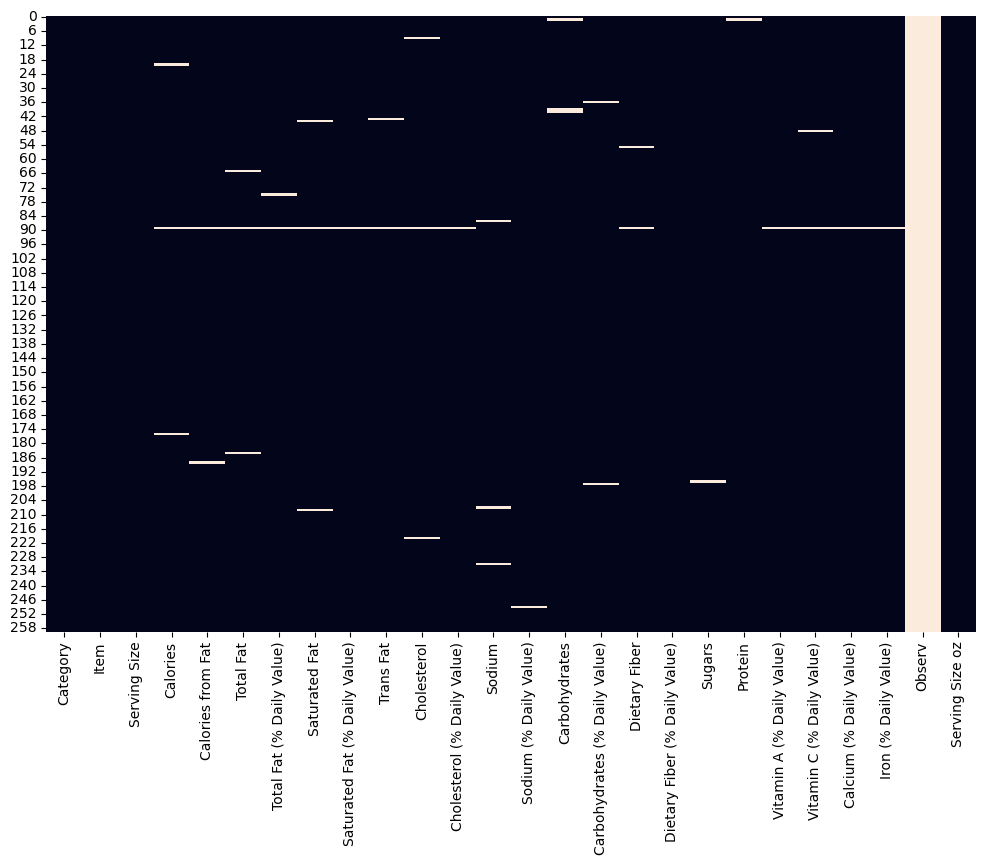

In [39]:
# ## TODO
import matplotlib.pyplot as plt


plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

1.10.2. Eliminar filas y columnas con todos los valores a NAN.

**NOTA**: Se recomienda crear un condicional 'if' dentro de un bucle 'for' para realizar el proceso

In [41]:
# ## TODO
for columna in df.columns:
    if df[columna].isnull().all():
        df.drop(columna, axis=1, inplace=True)

1.10.3. Obtener el porcentaje de registros a NAN que tiene cada categoria.  

In [43]:
# ## TODO
nan_df = df.isnull()
nan_porcentaje_category = nan_df.groupby(df['Category']).mean() * 100
nan_porcentaje_category = nan_porcentaje_category.drop(columns= ['Category','Item', 'Serving Size'])
media_nan_porcentaje_category = nan_porcentaje_category.mean(axis=1)

In [44]:
nan_porcentaje_category

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Serving Size oz
Category,,,,,,,,,,,,,,,,,,,,,
beef & pork,0.000000,0.000000,0.000000,0.000000,6.666667,0.000000,6.666667,0.000000,0.000000,0.000000,...,0.000000,6.666667,0.0,0.000000,0.000000,0.000000,6.666667,0.000000,0.000000,0.0
beverages,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
breakfast,2.380952,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.380952,0.000000,0.000000,...,2.380952,0.000000,0.0,0.000000,2.380952,0.000000,0.000000,0.000000,0.000000,0.0
chicken & fish,0.000000,0.000000,3.703704,3.703704,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
coffee & tea,1.052632,1.052632,1.052632,0.000000,1.052632,0.000000,0.000000,1.052632,0.000000,2.105263,...,1.052632,0.000000,0.0,1.052632,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
desserts,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
salads,16.666667,16.666667,16.666667,16.666667,16.666667,16.666667,16.666667,16.666667,16.666667,16.666667,...,0.000000,16.666667,0.0,0.000000,0.000000,16.666667,16.666667,16.666667,16.666667,0.0
smoothies & shakes,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
snacks & sides,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [45]:
media_nan_porcentaje_category

Category
beef & pork            1.212121
beverages              0.000000
breakfast              0.757576
chicken & fish         0.336700
coffee & tea           0.430622
desserts               0.000000
salads                11.363636
smoothies & shakes     0.162338
snacks & sides         0.000000
dtype: float64

1.10.4. Obtener el porcentaje de NAN que tiene cada elemento (fila).

**NOTA**: Se recomienda emplear una función para el cáculo del porcentaje

In [47]:
# ## TODO
def nan_porcentaje(fila: pd.Series):
    
    return (fila.isnull().sum() / len(fila)) * 100


df['per_nan'] = df.apply(nan_porcentaje, axis=1)

In [48]:
df[df['per_nan']>10]

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Serving Size oz,per_nan
89,salads,premium southwest salad with grilled chicken,11.8 oz (335 g),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,30,15.0,15.0,NaN,NaN,NaN,NaN,11.8,56.0


1.10.5. Eliminar las categorias y elementos (filas) que tengan más del 10% de nan  

**NOTA**: mostrar por pantalla si se han eliminado o no elementos

In [50]:
# ## TODO
filas_iniciales = df.shape[0]
df = df[df['per_nan'] <= 10]
filas_finales = df.shape[0]
filas_eliminadas = filas_iniciales - filas_finales
print(f"Se han eliminado {filas_eliminadas} filas con más del 10% de NAN.")

Se han eliminado 1 filas con más del 10% de NAN.


In [51]:
df[df['per_nan']>10]

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Serving Size oz,per_nan


In [52]:
category_a_mantener = media_nan_porcentaje_category[media_nan_porcentaje_category <= 10].index
category_a_eliminar = media_nan_porcentaje_category[media_nan_porcentaje_category > 10].index

In [53]:
print(f"Categorías a mantener (<= 10% de NAN): \n{list(
    category_a_mantener)} \n\nY a eliminar: \n{list(category_a_eliminar)}")


Categorías a mantener (<= 10% de NAN): 
['beef & pork', 'beverages', 'breakfast', 'chicken & fish', 'coffee & tea', 'desserts', 'smoothies & shakes', 'snacks & sides'] 

Y a eliminar: 
['salads']


In [54]:
df[df['Category']=='salads']

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Serving Size oz,per_nan
84,salads,premium bacon ranch salad (without chicken),7.9 oz (223 g),140.0,70.0,7.0,11.0,3.5,18.0,0.0,...,3.0,12,4.0,9.0,170.0,30.0,15.0,6.0,7.9,0.0
85,salads,premium bacon ranch salad with crispy chicken,9 oz (255 g),380.0,190.0,21.0,33.0,6.0,29.0,0.0,...,2.0,10,5.0,25.0,100.0,25.0,15.0,8.0,9.0,0.0
86,salads,premium bacon ranch salad with grilled chicken,8.5 oz (241 g),220.0,80.0,8.0,13.0,4.0,20.0,0.0,...,2.0,10,4.0,29.0,110.0,30.0,15.0,8.0,8.5,4.0
87,salads,premium southwest salad (without chicken),8.1 oz (230 g),140.0,40.0,4.5,7.0,2.0,9.0,0.0,...,6.0,23,6.0,6.0,160.0,25.0,15.0,10.0,8.1,0.0
88,salads,premium southwest salad with crispy chicken,12.3 oz (348 g),450.0,190.0,22.0,33.0,4.5,22.0,0.0,...,7.0,28,12.0,23.0,170.0,30.0,15.0,15.0,12.3,0.0


In [55]:
df = df[df['Category'].isin(category_a_mantener)]

In [56]:
df[df['Category']=='salads']

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Serving Size oz,per_nan


1.10.6. En las variables que tengan menos de 10% de nan, imputar los valores con su mediana calculada con los datos disponibles de la variable (columna)

**NOTA**: se deberá recomputar el porcentaje de nan para cada fila después de haber eliminado las filas y columnas en los dos puntos anteriores

In [58]:
columnas_numericas = df.select_dtypes(include=[np.number]).columns

In [59]:
columnas_numericas

Index(['Calories', 'Calories from Fat', 'Total Fat',
       'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)', 'Serving Size oz',
       'per_nan'],
      dtype='object')

In [60]:
columnas_a_imputar = []
for columna in columnas_numericas:
    if df[columna].isnull().any():
        columnas_a_imputar.append(columna)

In [61]:
columnas_a_imputar

['Calories',
 'Calories from Fat',
 'Total Fat',
 'Total Fat (% Daily Value)',
 'Saturated Fat',
 'Trans Fat',
 'Cholesterol',
 'Sodium',
 'Sodium (% Daily Value)',
 'Carbohydrates',
 'Carbohydrates (% Daily Value)',
 'Dietary Fiber',
 'Sugars',
 'Protein',
 'Vitamin C (% Daily Value)']

In [62]:
df['per_nan'][df['per_nan']!=0].count()

22

In [63]:
# ## TODO
for columna in columnas_a_imputar:
    mediana = df[columna].median()
    df[columna]=df[columna].fillna(mediana)

In [64]:
df['per_nan'] = df.apply(nan_porcentaje, axis=1)

In [65]:
df['per_nan'][df['per_nan']!=0].count()

0

1.10.7. Nuevo mapa de calor sin los NAN

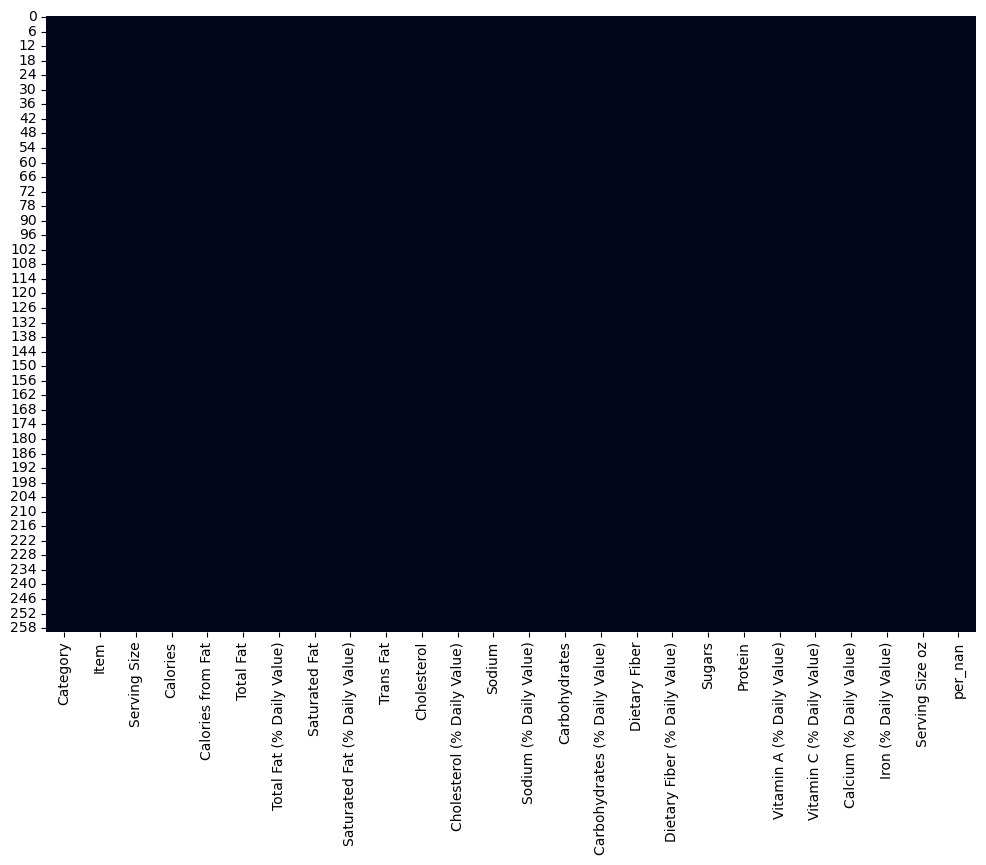

In [67]:
# ## TODO
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

2. Carga y primera toma de contacto con el fichero de review 

2.1. Cargar el csv 'reviews.csv' y visualizar los cinco primeros registros

In [69]:
# ## TODO
df2 = pd.read_csv('2024_01/reviews.csv', sep='|')
df2.head()

,Category,Item,Reviews,Stars
0,breakfast,egg mcmuffin,575,5
1,breakfast,egg white delight,680,0
2,breakfast,sausage mcmuffin,398,5
3,breakfast,sausage mcmuffin with egg,766,2
4,breakfast,sausage mcmuffin with egg whites,6,5


In [70]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  250 non-null    object
 1   Item      250 non-null    object
 2   Reviews   250 non-null    int64 
 3   Stars     250 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 7.9+ KB


2.2. ¿Has tenido que añadir algún argumento adicional a la función pd.read_csv() para poder abrir correctamente el CSV?

In [72]:
# ## RESPONDER: Si, he tenido que abrir reviews.csv con un editor de texto y ver el separador que utilizaba

2.3. Agregar al valor de Stars la palabra stars de forma que la variable 'Stars' se convierta en una variable categórica con valores atendiendo a la forma 'X stars'. Es decir, en vez de 5 -> 5 stars

In [74]:
# ## TODO
df2['Stars'] = df2['Stars'].astype(str) + ' stars'

2.4. Combinar el dataframe obtenido al completar la parte 1 del ejercicio A y el dataframe de esta parte 2. Para ello, emplear los atributos ['Category', 'Item']

In [76]:
# ## TODO
df_merge = pd.merge(df, df2, on=['Category', 'Item'], how='right')

In [77]:
# Right no usaria ya que son lineas de salads que fue borrada esa categoría
df_merge[df_merge.isnull().any(axis=1)]

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Serving Size oz,per_nan,Reviews,Stars
84,salads,premium bacon ranch salad (without chicken),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,569,4 stars
85,salads,premium bacon ranch salad with crispy chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,653,5 stars
86,salads,premium bacon ranch salad with grilled chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,355,3 stars
87,salads,premium southwest salad (without chicken),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,773,0 stars
88,salads,premium southwest salad with crispy chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,912,1 stars


In [78]:
df_merge = pd.merge(df, df2, on=['Category', 'Item'], how='left')
df_merge[df_merge.isnull().any(axis=1)]

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Serving Size oz,per_nan,Reviews,Stars
245,smoothies & shakes,shamrock shake (large),22 fl oz cup,820.0,210.0,23.0,35.0,15.0,73.0,1.0,...,115.0,18.0,30.0,0.0,60.0,0.0,22.0,0.0,NaN,NaN
246,smoothies & shakes,mcflurry with m&m’s candies (small),10.9 oz (310 g),650.0,210.0,23.0,35.0,14.0,72.0,0.5,...,89.0,13.0,15.0,0.0,45.0,8.0,10.9,0.0,NaN,NaN
247,smoothies & shakes,mcflurry with m&m’s candies (medium),16.2 oz (460 g),930.0,290.0,33.0,50.0,20.0,102.0,1.0,...,128.0,20.0,25.0,0.0,70.0,10.0,16.2,0.0,NaN,NaN
248,smoothies & shakes,mcflurry with m&m’s candies (snack),7.3 oz (207 g),430.0,140.0,15.0,24.0,10.0,48.0,0.0,...,59.0,9.0,10.0,0.0,30.0,4.0,7.3,0.0,NaN,NaN
249,smoothies & shakes,mcflurry with oreo cookies (small),10.1 oz (285 g),510.0,150.0,17.0,26.0,9.0,44.0,0.5,...,64.0,12.0,15.0,0.0,40.0,8.0,10.1,0.0,NaN,NaN
250,smoothies & shakes,mcflurry with oreo cookies (medium),13.4 oz (381 g),690.0,200.0,23.0,35.0,12.0,58.0,1.0,...,85.0,15.0,20.0,0.0,50.0,10.0,13.4,0.0,NaN,NaN
251,smoothies & shakes,mcflurry with oreo cookies (snack),6.7 oz (190 g),340.0,100.0,11.0,17.0,6.0,29.0,0.0,...,43.0,8.0,10.0,0.0,25.0,6.0,6.7,0.0,NaN,NaN
252,smoothies & shakes,mcflurry with reese's peanut butter cups (medium),14.2 oz (403 g),810.0,290.0,32.0,50.0,15.0,76.0,1.0,...,103.0,21.0,20.0,0.0,60.0,6.0,14.2,0.0,NaN,NaN
253,smoothies & shakes,mcflurry with reese's peanut butter cups (snack),7.1 oz (202 g),410.0,150.0,16.0,25.0,8.0,38.0,0.0,...,51.0,10.0,10.0,0.0,30.0,4.0,7.1,0.0,NaN,NaN


In [79]:
# Left no lo usaria tampoco ya que no tiene esos registros en el df2
df2[df2['Item'].str.contains(r'shamrock shake \(large|mcflurry')]

,Category,Item,Reviews,Stars


In [80]:
# Uso inner que parece mas logico viendo el df resultante...
df_merge = pd.merge(df, df2, on=['Category', 'Item'], how='inner')

In [81]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       245 non-null    object 
 1   Item                           245 non-null    object 
 2   Serving Size                   245 non-null    object 
 3   Calories                       245 non-null    float64
 4   Calories from Fat              245 non-null    float64
 5   Total Fat                      245 non-null    float64
 6   Total Fat (% Daily Value)      245 non-null    float64
 7   Saturated Fat                  245 non-null    float64
 8   Saturated Fat (% Daily Value)  245 non-null    float64
 9   Trans Fat                      245 non-null    float64
 10  Cholesterol                    245 non-null    float64
 11  Cholesterol (% Daily Value)    245 non-null    float64
 12  Sodium                         245 non-null    flo

In [82]:
df_merge

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Serving Size oz,per_nan,Reviews,Stars
0,breakfast,egg mcmuffin,4.8 oz (136 g),300.0,120.0,13.0,20.0,5.0,25.0,0.0,...,3.0,17.0,10.0,0.0,25.0,15.0,4.8,0.0,575,5 stars
1,breakfast,egg white delight,4.8 oz (135 g),250.0,70.0,8.0,12.0,3.0,15.0,0.0,...,3.0,12.0,6.0,0.0,25.0,8.0,4.8,0.0,680,0 stars
2,breakfast,sausage mcmuffin,3.9 oz (111 g),370.0,200.0,23.0,35.0,8.0,42.0,0.0,...,2.0,14.0,8.0,0.0,25.0,10.0,3.9,0.0,398,5 stars
3,breakfast,sausage mcmuffin with egg,5.7 oz (161 g),450.0,250.0,28.0,43.0,10.0,52.0,0.0,...,2.0,21.0,15.0,0.0,30.0,15.0,5.7,0.0,766,2 stars
4,breakfast,sausage mcmuffin with egg whites,5.7 oz (161 g),400.0,210.0,23.0,35.0,8.0,42.0,0.0,...,2.0,21.0,6.0,0.0,25.0,10.0,5.7,0.0,6,5 stars
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,smoothies & shakes,strawberry shake (large),22 fl oz cup,850.0,210.0,24.0,36.0,15.0,75.0,1.0,...,123.0,18.0,30.0,0.0,70.0,0.0,22.0,0.0,65,1 stars
241,smoothies & shakes,chocolate shake (small),12 fl oz cup,560.0,150.0,16.0,25.0,10.0,51.0,1.0,...,77.0,12.0,20.0,0.0,40.0,8.0,12.0,0.0,287,5 stars
242,smoothies & shakes,chocolate shake (medium),16 fl oz cup,700.0,180.0,20.0,30.0,12.0,62.0,1.0,...,97.0,15.0,25.0,0.0,50.0,10.0,16.0,0.0,770,0 stars
243,smoothies & shakes,chocolate shake (large),22 fl oz cup,850.0,210.0,23.0,36.0,15.0,74.0,1.0,...,120.0,19.0,30.0,0.0,60.0,15.0,22.0,0.0,161,3 stars


2.5. Eliminar las columnas ['Serving Size', 'per_nan']

In [84]:
# ## TODO
df_merge = df_merge.drop(columns=['Serving Size', 'per_nan'])

2.6. Muestra el registro con mayor número de Reviews

In [86]:
# ##TODO
print("Registro con el mayor número de reviews:")
df_merge[df_merge['Reviews'] == df_merge['Reviews'].max()]

Registro con el mayor número de reviews:


,Category,Item,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,...,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Serving Size oz,Reviews,Stars
230,smoothies & shakes,strawberry banana smoothie (medium),250.0,5.0,1.0,1.0,0.0,0.0,0.0,5.0,...,13,54.0,4.0,0.0,35.0,8.0,4.0,16.0,993,1 stars


In [87]:
df_merge.sort_values(by='Reviews', ascending=False).head(1)

,Category,Item,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,...,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Serving Size oz,Reviews,Stars
230,smoothies & shakes,strawberry banana smoothie (medium),250.0,5.0,1.0,1.0,0.0,0.0,0.0,5.0,...,13,54.0,4.0,0.0,35.0,8.0,4.0,16.0,993,1 stars


### **Parte B.** **Análisis estadístico**:

1. Obtener las principales métricas estadísticas (media, mediana, desviación estándar, percentil 25, percentil 75, moda, máximo, mínimo) de las variables numéricas.

**NOTA**: Se recomienda emplear los métodos: select_dtypes o _get_numeric_data

In [90]:
# ## TODO
columnas_numericas = df_merge.select_dtypes(include='number')

metricas = columnas_numericas.describe(percentiles=[0.25, 0.75]).T
metricas['mode'] = columnas_numericas.mode().iloc[0]

print("Métricas estadísticas:")
metricas

Métricas estadísticas:


,count,mean,std,min,25%,50%,75%,max,mode
Calories,245.0,361.836735,238.161705,0.0,210.0,340.0,480.0,1880.0,0.0
Calories from Fat,245.0,125.408163,130.078148,0.0,10.0,100.0,200.0,1060.0,0.0
Total Fat,245.0,13.924490,14.455040,0.0,1.0,11.0,22.0,118.0,0.0
Total Fat (% Daily Value),245.0,21.432653,22.273094,0.0,2.0,17.0,34.0,182.0,0.0
Saturated Fat,245.0,5.814286,5.257041,0.0,0.5,5.0,9.0,20.0,0.0
Saturated Fat (% Daily Value),245.0,29.142857,26.418604,0.0,3.0,24.0,47.0,101.0,0.0
Trans Fat,245.0,0.189796,0.419428,0.0,0.0,0.0,0.0,2.5,0.0
Cholesterol,245.0,55.183673,89.716464,0.0,5.0,30.0,65.0,575.0,0.0
Cholesterol (% Daily Value),245.0,18.465306,29.912506,0.0,2.0,11.0,21.0,192.0,0.0
Sodium,245.0,502.836735,590.432613,0.0,90.0,180.0,930.0,3600.0,180.0


2. Representar distribución de las variables numéricas y realizar el test de normalidad a cada una de ellas para valorar si siguen una distribución normal.

**NOTA**: Se puede reutilizar el resulatdo del método empleado en el apartado anterior

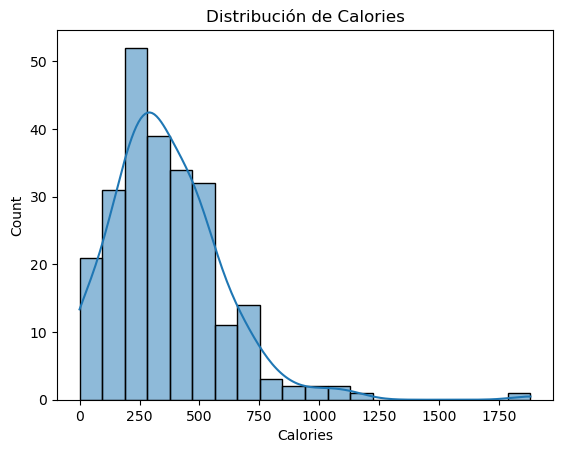

Test de Shapiro-Wilk para Calories:
Estadístico: 0.9114816888832917, p-value: 7.235785093726208e-11
La distribución de Calories NO es normal.



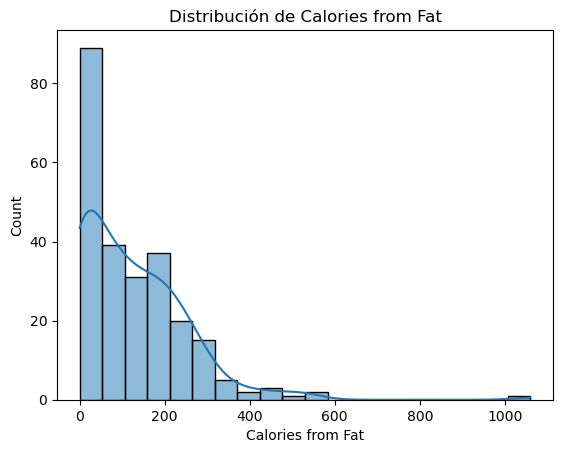

Test de Shapiro-Wilk para Calories from Fat:
Estadístico: 0.823811861311332, p-value: 5.700259746533352e-16
La distribución de Calories from Fat NO es normal.



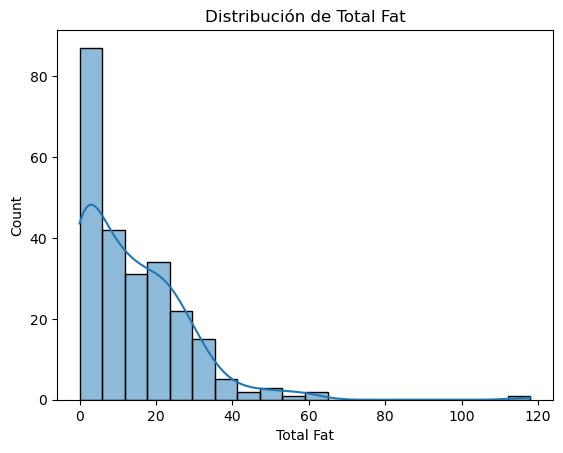

Test de Shapiro-Wilk para Total Fat:
Estadístico: 0.8230763402386405, p-value: 5.26838897961669e-16
La distribución de Total Fat NO es normal.



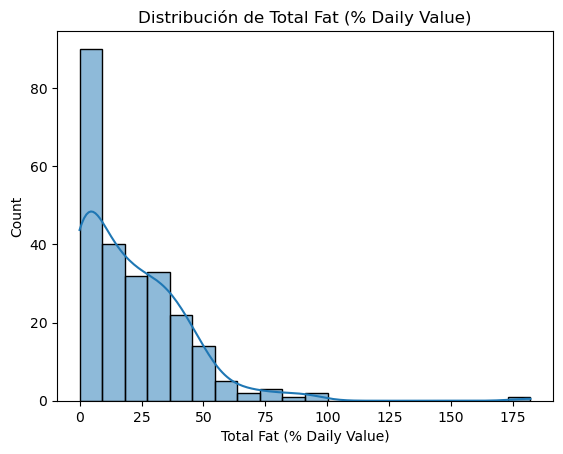

Test de Shapiro-Wilk para Total Fat (% Daily Value):
Estadístico: 0.8226644220400838, p-value: 5.041500551421021e-16
La distribución de Total Fat (% Daily Value) NO es normal.



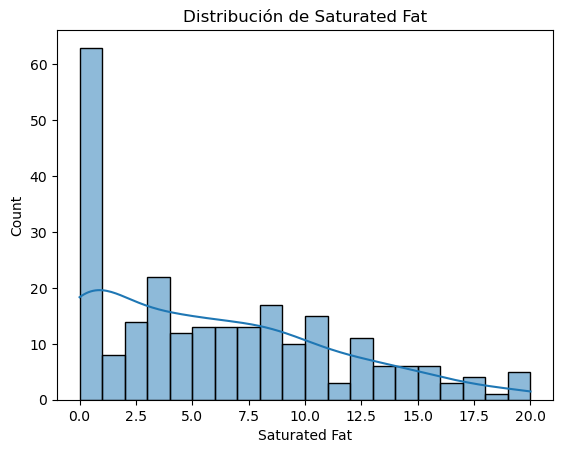

Test de Shapiro-Wilk para Saturated Fat:
Estadístico: 0.9097442819867793, p-value: 5.374511910946513e-11
La distribución de Saturated Fat NO es normal.



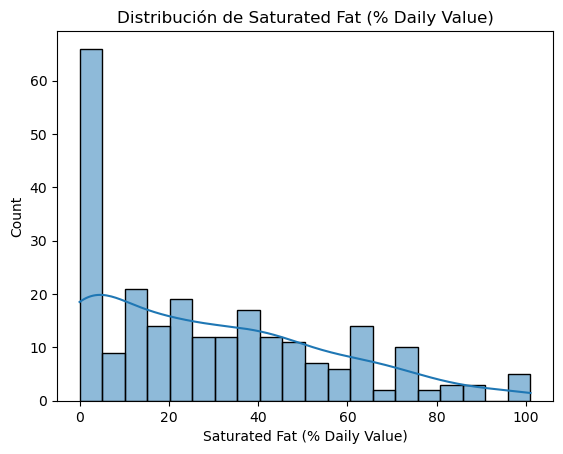

Test de Shapiro-Wilk para Saturated Fat (% Daily Value):
Estadístico: 0.9101922115986996, p-value: 5.800670255272069e-11
La distribución de Saturated Fat (% Daily Value) NO es normal.



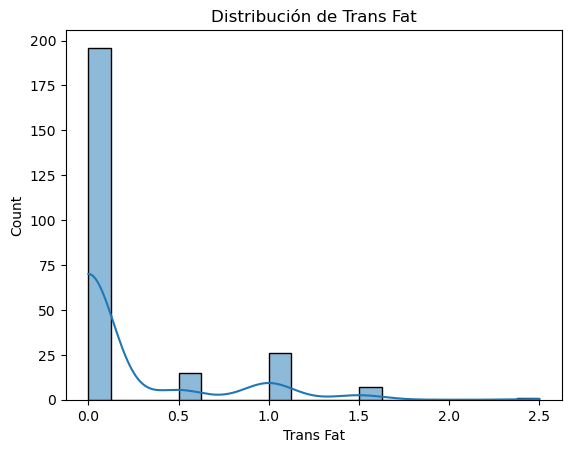

Test de Shapiro-Wilk para Trans Fat:
Estadístico: 0.5116963223415893, p-value: 1.527156768720428e-25
La distribución de Trans Fat NO es normal.



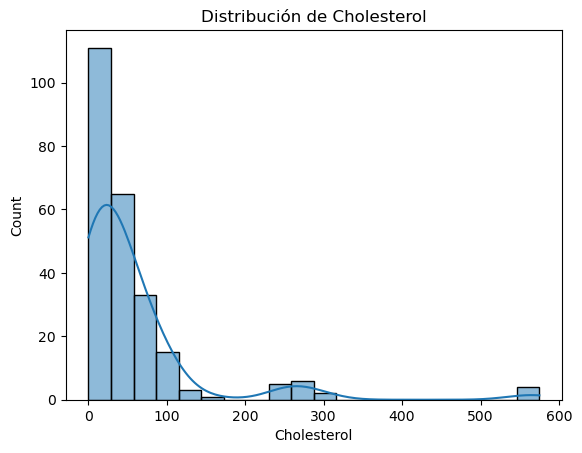

Test de Shapiro-Wilk para Cholesterol:
Estadístico: 0.5648431833885661, p-value: 2.43691801900544e-24
La distribución de Cholesterol NO es normal.



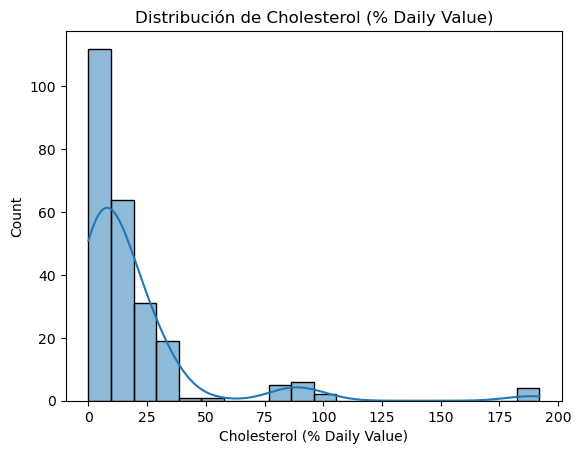

Test de Shapiro-Wilk para Cholesterol (% Daily Value):
Estadístico: 0.5652207044017065, p-value: 2.4876228881602412e-24
La distribución de Cholesterol (% Daily Value) NO es normal.



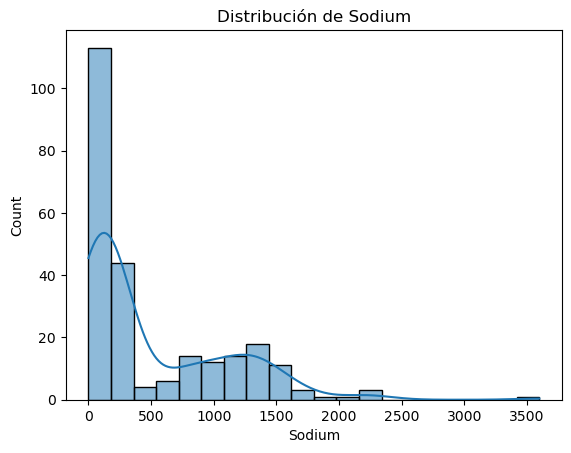

Test de Shapiro-Wilk para Sodium:
Estadístico: 0.7796943695483285, p-value: 7.307838033282099e-18
La distribución de Sodium NO es normal.



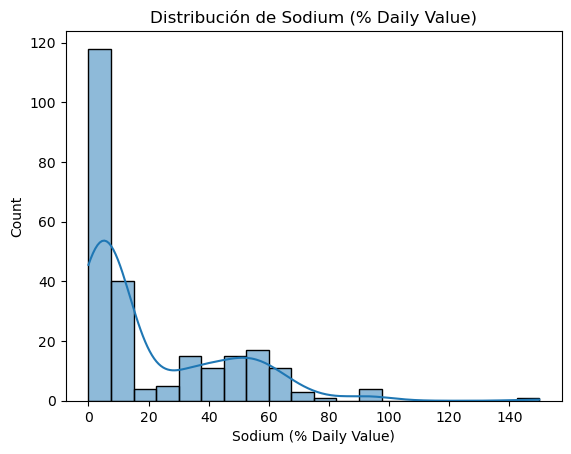

Test de Shapiro-Wilk para Sodium (% Daily Value):
Estadístico: 0.7787125784537194, p-value: 6.682910371695619e-18
La distribución de Sodium (% Daily Value) NO es normal.



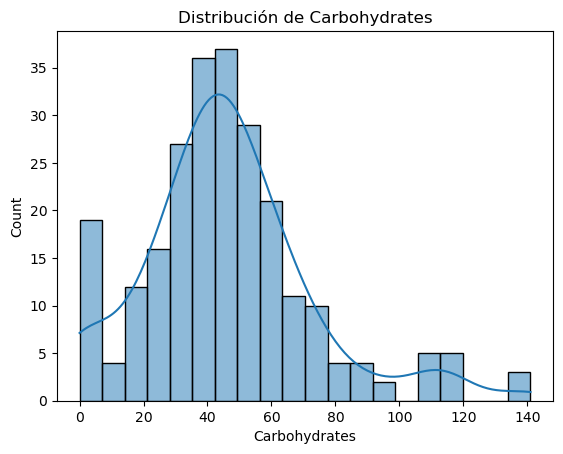

Test de Shapiro-Wilk para Carbohydrates:
Estadístico: 0.9395183530827126, p-value: 1.6418846340282996e-08
La distribución de Carbohydrates NO es normal.



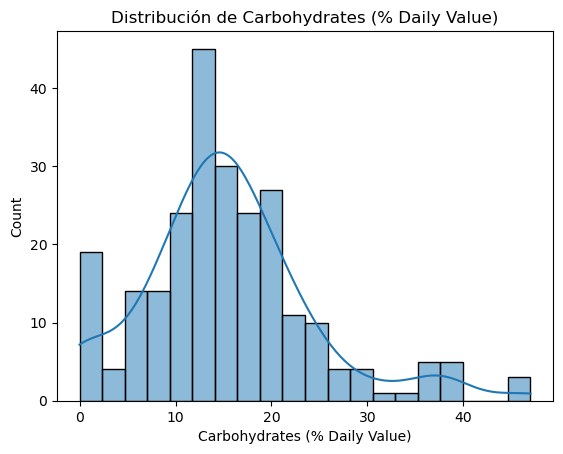

Test de Shapiro-Wilk para Carbohydrates (% Daily Value):
Estadístico: 0.9403878659628165, p-value: 1.987779193856528e-08
La distribución de Carbohydrates (% Daily Value) NO es normal.



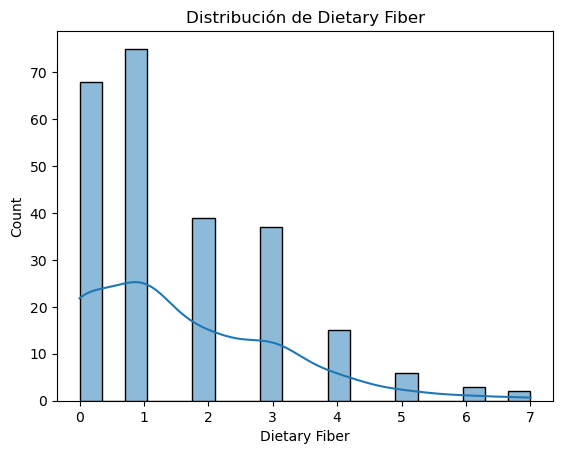

Test de Shapiro-Wilk para Dietary Fiber:
Estadístico: 0.8670457943515149, p-value: 9.449882766241744e-14
La distribución de Dietary Fiber NO es normal.



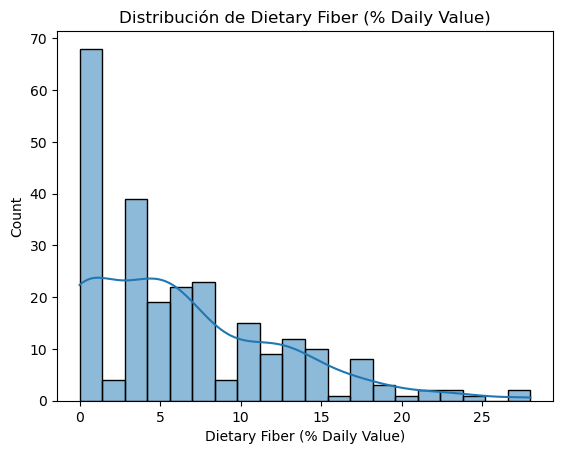

Test de Shapiro-Wilk para Dietary Fiber (% Daily Value):
Estadístico: 0.8868042438110223, p-value: 1.4507939822398377e-12
La distribución de Dietary Fiber (% Daily Value) NO es normal.



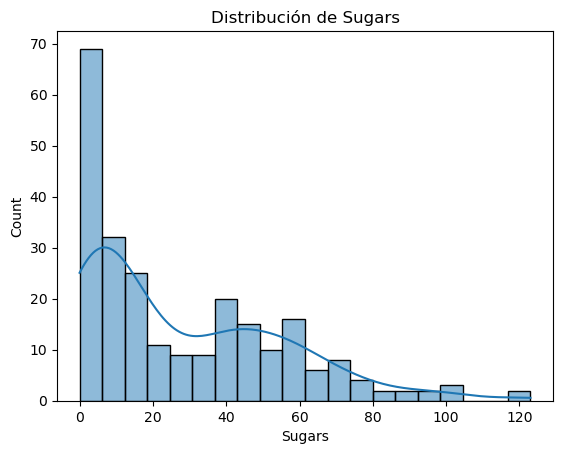

Test de Shapiro-Wilk para Sugars:
Estadístico: 0.8822770064831049, p-value: 7.550494257692081e-13
La distribución de Sugars NO es normal.



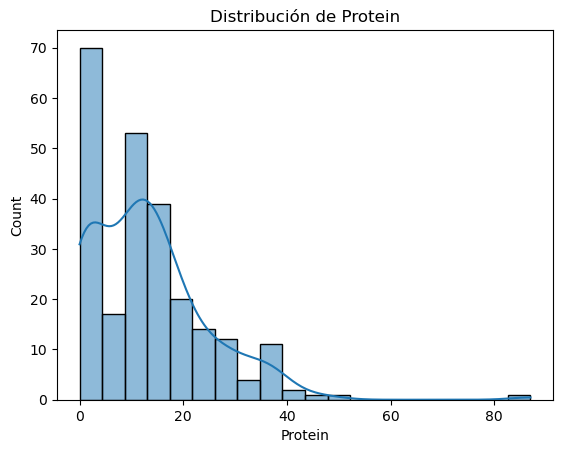

Test de Shapiro-Wilk para Protein:
Estadístico: 0.8771608959797538, p-value: 3.683723358929907e-13
La distribución de Protein NO es normal.



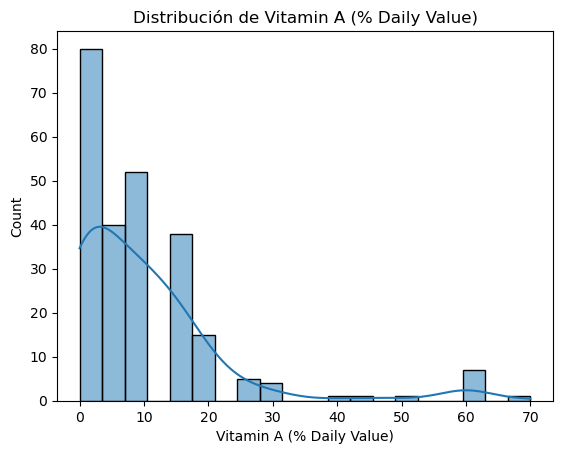

Test de Shapiro-Wilk para Vitamin A (% Daily Value):
Estadístico: 0.7134692976509897, p-value: 3.0925838868898215e-20
La distribución de Vitamin A (% Daily Value) NO es normal.



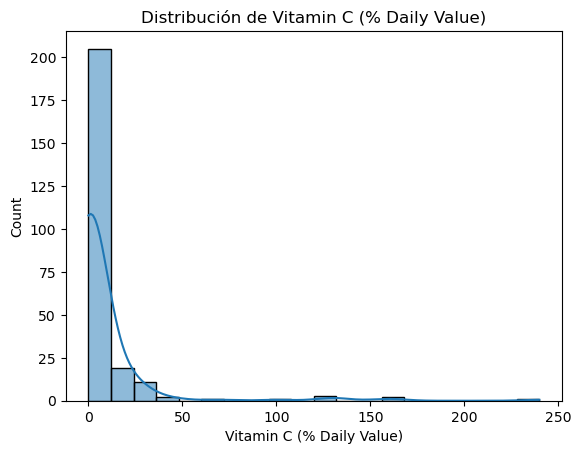

Test de Shapiro-Wilk para Vitamin C (% Daily Value):
Estadístico: 0.33358415582255996, p-value: 6.071373515711368e-29
La distribución de Vitamin C (% Daily Value) NO es normal.



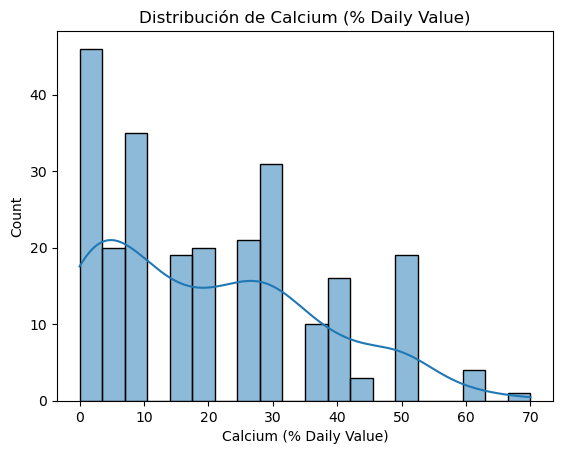

Test de Shapiro-Wilk para Calcium (% Daily Value):
Estadístico: 0.9252993832053282, p-value: 8.918979253701516e-10
La distribución de Calcium (% Daily Value) NO es normal.



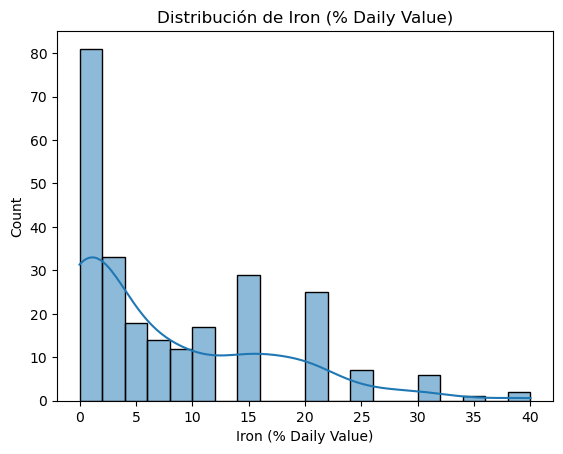

Test de Shapiro-Wilk para Iron (% Daily Value):
Estadístico: 0.8238378381271324, p-value: 5.716167876618036e-16
La distribución de Iron (% Daily Value) NO es normal.



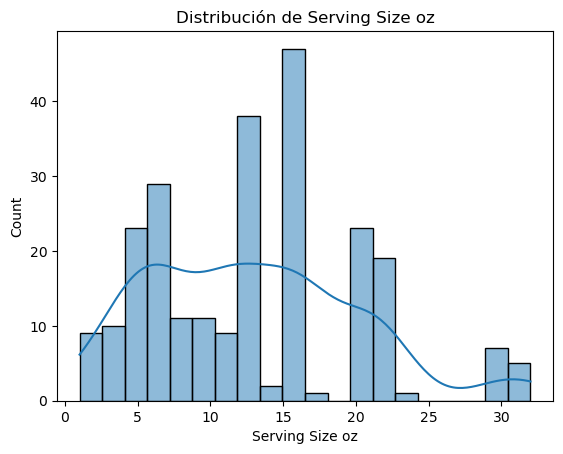

Test de Shapiro-Wilk para Serving Size oz:
Estadístico: 0.9491358622084104, p-value: 1.5030342837926566e-07
La distribución de Serving Size oz NO es normal.



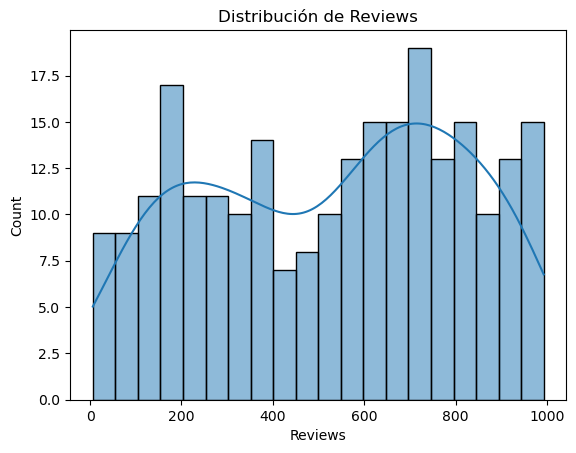

Test de Shapiro-Wilk para Reviews:
Estadístico: 0.9480972014123485, p-value: 1.1701517732126776e-07
La distribución de Reviews NO es normal.



In [92]:
# ## TODO
import seaborn as sns
from scipy.stats import shapiro


for columna in columnas_numericas.columns:
    sns.histplot(df_merge[columna], kde=True, bins=20)
    plt.title(f"Distribución de {columna}")
    plt.show()
    
    stat, p = shapiro(df_merge[columna].dropna())
    print(f"Test de Shapiro-Wilk para {columna}:")
    print(f"Estadístico: {stat}, p-value: {p}")
    if p > 0.05:
        print(f"La distribución de {columna} parece normal.\n")
    else:
        print(f"La distribución de {columna} NO es normal.\n")

3. La distribución de azucar es estadísticamente distinta en los 'Desserts' y los 'Breakfast'?  

Representar en cada caso (calorías y azúcar) las distribuciones para Desserts y Breakfast en una misma gráfica para observar mejor las discrepacias (o no).

**NOTA**: La selección del test dependerá de si las distribuciones son normales o no (resultados del apartado anterior).

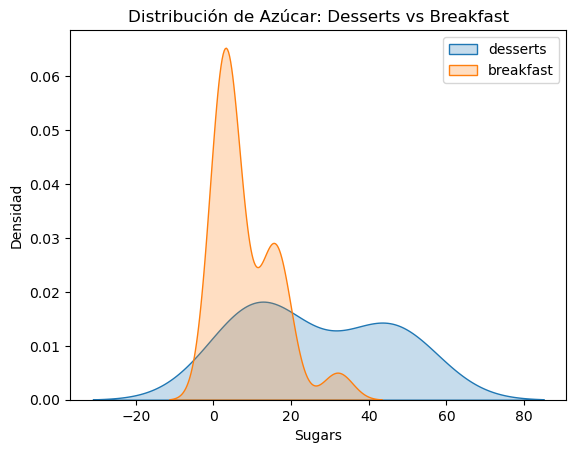

In [94]:
# ## TODO
desserts = df_merge[df_merge['Category'] == 'desserts']
breakfast = df_merge[df_merge['Category'] == 'breakfast']

sns.kdeplot(desserts['Sugars'], label='desserts', fill=True)
sns.kdeplot(breakfast['Sugars'], label='breakfast', fill=True)
plt.title('Distribución de Azúcar: Desserts vs Breakfast')
plt.xlabel('Sugars')
plt.ylabel('Densidad')
plt.legend()
plt.show()

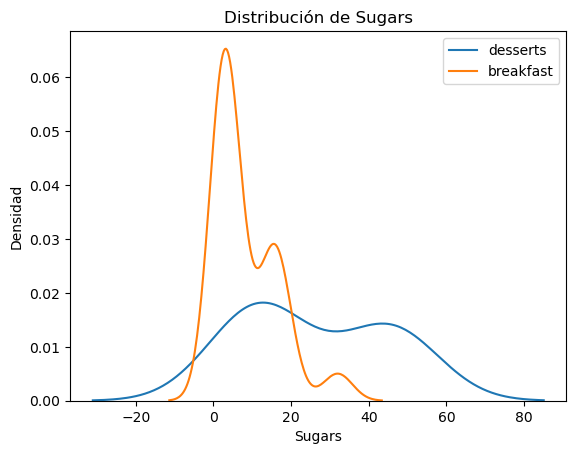

Test de Shapiro-Wilk para Sugars de desserts:
Estadístico: 0.8069251174697856, p-value: 0.04793014901768078
La distribución de Sugars NO es normal.

Test de Shapiro-Wilk para Sugars de breakfast:
Estadístico: 0.7678530554559995, p-value: 9.779610387383376e-07
La distribución de Sugars NO es normal.



In [95]:
sns.kdeplot(desserts['Sugars'], label='desserts')
sns.kdeplot(breakfast['Sugars'], label='breakfast')
plt.xlabel('Sugars')
plt.ylabel('Densidad')
plt.legend()
plt.title(f"Distribución de {'Sugars'}")
plt.show()

stat, p = shapiro(desserts['Sugars'].dropna())
print(f"Test de Shapiro-Wilk para {'Sugars'} de desserts:")
print(f"Estadístico: {stat}, p-value: {p}")
if p > 0.05:
    print(f"La distribución de {'Sugars'} parece normal.\n")
else:
    print(f"La distribución de {'Sugars'} NO es normal.\n")

stat, p = shapiro(breakfast['Sugars'].dropna())
print(f"Test de Shapiro-Wilk para {'Sugars'} de breakfast:")
print(f"Estadístico: {stat}, p-value: {p}")
if p > 0.05:
    print(f"La distribución de {'Sugars'} parece normal.\n")
else:
    print(f"La distribución de {'Sugars'} NO es normal.\n")

In [96]:
from scipy.stats import mannwhitneyu
# Sabiendo que en el primer calculo de distribución de las variables sin usar la categoría,
# los valores eran Estadístico: 0.8822770064831049, p-value: 7.550494257692081e-13
# la distribución no es normal por que el test Shapiro-Wilk indica que la Hipotesis nula no es 
# valida (es decir, presuponemos que hay una distribución normal) y p-value y la visualización
# grafica nos lo confirma.
# Una vez usado Shapiro, para entender y hacer contrasete con lo observado (que no es una distribución
# normal), debemos usar un test U, si la hipotesis nula se hubiera confirmado, podriamos usar el test T
stat, p = mannwhitneyu(desserts['Sugars'].dropna(), breakfast['Sugars'].dropna())
print(f"Resultados del Test de Mann-Whitney U: Estadístico={stat}, p-valor={p}")

Resultados del Test de Mann-Whitney U: Estadístico=239.0, p-valor=0.008042131983911866


In [97]:
# Que el test estadistico y p-value indique en Sugars que la distribución no sea normal, 
# El test U nos indica que, hay una gran diferencia entre breakfast y desserts, y nos confirma el valor
# de p que eso es asi. Y ademas, el grafico de distribución lo vemos.
# El problema, es que puede perder potencia estadistica, para ello, lo ideal es mostrarlo
# con la transformacion Box-Cox

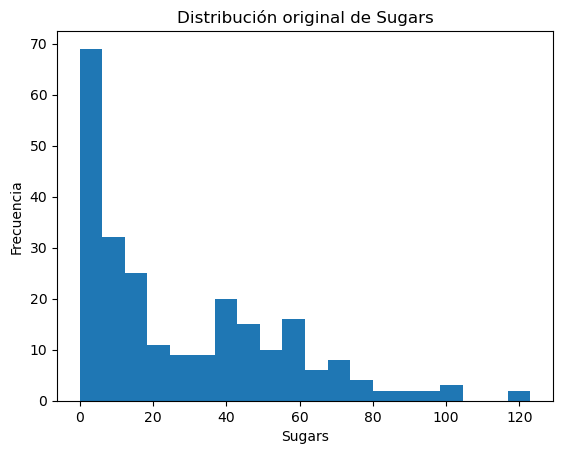

In [98]:
from scipy.stats import boxcox, boxcox_normmax, shapiro


datos = df_merge['Sugars'].dropna()
plt.hist(datos, bins=20)
plt.title("Distribución original de Sugars")
plt.xlabel('Sugars')
plt.ylabel('Frecuencia')
plt.show()

In [99]:
df_merge[df_merge['Category'].isin(['desserts', 'breakfast'])]

,Category,Item,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,...,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Serving Size oz,Reviews,Stars
0,breakfast,egg mcmuffin,300.0,120.0,13.0,20.0,5.0,25.0,0.0,260.0,...,17,3.0,17.0,10.0,0.0,25.0,15.0,4.8,575,5 stars
1,breakfast,egg white delight,250.0,70.0,8.0,12.0,3.0,15.0,0.0,25.0,...,17,3.0,12.0,6.0,0.0,25.0,8.0,4.8,680,0 stars
2,breakfast,sausage mcmuffin,370.0,200.0,23.0,35.0,8.0,42.0,0.0,45.0,...,17,2.0,14.0,8.0,0.0,25.0,10.0,3.9,398,5 stars
3,breakfast,sausage mcmuffin with egg,450.0,250.0,28.0,43.0,10.0,52.0,0.0,285.0,...,17,2.0,21.0,15.0,0.0,30.0,15.0,5.7,766,2 stars
4,breakfast,sausage mcmuffin with egg whites,400.0,210.0,23.0,35.0,8.0,42.0,0.0,50.0,...,17,2.0,21.0,6.0,0.0,25.0,10.0,5.7,6,5 stars
5,breakfast,steak & egg mcmuffin,430.0,210.0,23.0,36.0,9.0,46.0,1.0,300.0,...,18,3.0,26.0,15.0,2.0,30.0,20.0,6.5,787,3 stars
6,breakfast,"bacon, egg & cheese biscuit (regular biscuit)",460.0,230.0,26.0,40.0,13.0,65.0,0.0,250.0,...,7,3.0,19.0,10.0,8.0,15.0,15.0,5.3,656,3 stars
7,breakfast,"bacon, egg & cheese biscuit (large biscuit)",520.0,270.0,30.0,47.0,14.0,68.0,0.0,250.0,...,12,4.0,19.0,15.0,8.0,20.0,20.0,5.8,611,0 stars
8,breakfast,"bacon, egg & cheese biscuit with egg whites (r...",410.0,180.0,20.0,32.0,11.0,56.0,0.0,35.0,...,7,3.0,20.0,2.0,8.0,15.0,10.0,5.4,961,4 stars
9,breakfast,"bacon, egg & cheese biscuit with egg whites (l...",470.0,220.0,25.0,38.0,12.0,59.0,0.0,35.0,...,12,4.0,20.0,6.0,8.0,15.0,15.0,5.9,807,0 stars


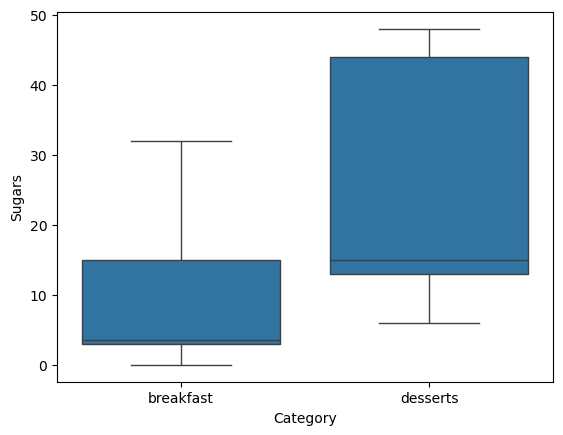

In [100]:
sns.boxplot(data=df_merge[df_merge['Category'].isin(['desserts', 'breakfast'])],
            x='Category', y='Sugars')
plt.show()

In [101]:
(datos <= 0).sum()

25

In [102]:
datos = datos + abs(datos.min()) + 1  # como hay transformaciones/multiplicaciones, no puede ser <=0 ningun dato

In [103]:
from scipy.stats import boxcox, boxcox_normmax


lambda_optimo = boxcox_normmax(datos)

In [104]:
lambda_optimo

0.3387860103046254

In [105]:
datos_boxcox = boxcox(datos, lmbda=lambda_optimo)

In [106]:
print(f"Datos transformados: \n{datos_boxcox}")

Datos transformados: 
[ 1.76939333  1.76939333  1.33097326  1.33097326  1.33097326  1.76939333
  1.76939333  2.14013648  1.76939333  2.14013648  1.33097326  1.76939333
  1.33097326  1.76939333  1.76939333  1.76939333  1.76939333  2.14013648
  1.76939333  4.59944189  4.75613706  4.59944189  4.59944189  4.59944189
  3.01903285  3.26210248  3.01903285  1.76939333  1.76939333  1.76939333
  2.14013648  4.90685008  4.90685008  4.90685008  5.05212359  4.43612963
  4.43612963  1.33097326  0.          6.69825087  6.69825087  5.05212359
  3.48790873  3.69923612  4.08650617  3.69923612  3.48790873  3.69923612
  2.75494329  3.01903285  3.01903285  4.43612963  3.01903285  3.01903285
  3.01903285  2.75494329  3.89821279  3.69923612  3.26210248  3.89821279
  3.48790873  3.89821279  3.48790873  4.75613706  4.43612963  3.01903285
  2.46456652  2.75494329  2.75494329  2.46456652  3.01903285  2.75494329
  3.26210248  2.75494329  4.08650617  3.69923612  4.43612963  4.08650617
  0.          0.          0. 

In [107]:
from scipy.stats import shapiro

# Test de Shapiro-Wilk
stat, p = shapiro(datos_boxcox)
print(f"Test de Shapiro-Wilk después de Box-Cox: Estadístico={stat}, p-value={p}")

Test de Shapiro-Wilk después de Box-Cox: Estadístico=0.9545429842021556, p-value=5.815083694097836e-07


In [108]:
# Indica que los valores siguen sin ser normales, el estadistico esta cerca de 1, entonces tiene 
# mejor distribución que antes (0.88...), sin embargo p es bajo e indica que nos equivocamos en
# aceptar la hipotesis nula

<Axes: >

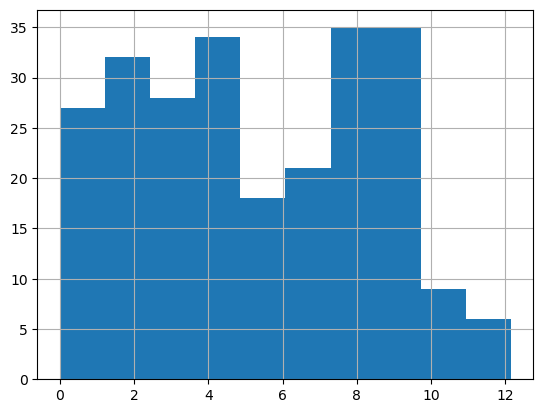

In [109]:
pd.Series(datos_boxcox).hist()

In [110]:
# Sin embargo visualmente parece una distribución mas homogenea que la inicial, pero sigue sin ser normal

4. Y la distribución de las calorías? 

In [112]:
stat, p = shapiro(desserts['Calories'].dropna())
print(f"Test de Shapiro-Wilk para {'Calories'} de desserts:")
print(f"Estadístico: {stat}, p-value: {p}")
if p > 0.05:
    print(f"La distribución de {'Calories'} parece normal.\n")
else:
    print(f"La distribución de {'Calories'} NO es normal.\n")

stat, p = shapiro(breakfast['Calories'].dropna())
print(f"Test de Shapiro-Wilk para {'Calories'} de breakfast:")
print(f"Estadístico: {stat}, p-value: {p}")
if p > 0.05:
    print(f"La distribución de {'Calories'} parece normal.\n")
else:
    print(f"La distribución de {'Calories'} NO es normal.\n")

Test de Shapiro-Wilk para Calories de desserts:
Estadístico: 0.9298485550467439, p-value: 0.5496122704594217
La distribución de Calories parece normal.

Test de Shapiro-Wilk para Calories de breakfast:
Estadístico: 0.8821200786774002, p-value: 0.00043806915772840843
La distribución de Calories NO es normal.



In [113]:
# Dado que queremos comparar 2 grupos, no podemos usar ttest para hacerlo, aunque desserts es normal
# breakfast no lo es, entonces tenemos que usar un test no parametrizado que es un test para distribuciónes no normales

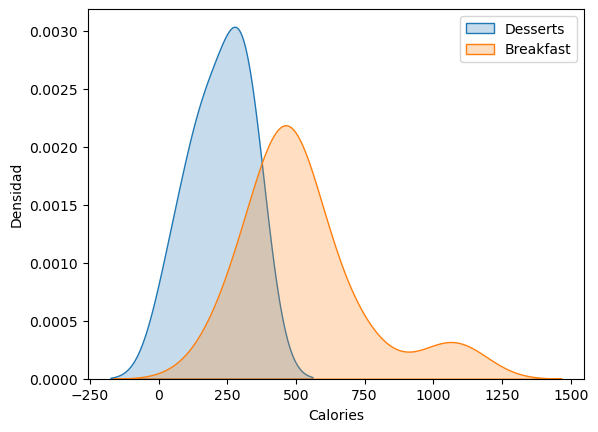

Resultados del Test de Mann-Whitney U para las diferencias de caliroas  entre Desserts y Breakfast:
Estadístico: 18.5, p-value: 0.000253006730667172
Hay diferencias estadísticamente significativas en las Calorías entre Desserts y Breakfast.


In [114]:
sns.kdeplot(desserts['Calories'], label='Desserts', fill=True)
sns.kdeplot(breakfast['Calories'], label='Breakfast', fill=True)
plt.xlabel('Calories')
plt.ylabel('Densidad')
plt.legend()
plt.show()

stat, p = mannwhitneyu(desserts['Calories'].dropna(), breakfast['Calories'].dropna())
print(f"Resultados del Test de Mann-Whitney U para las diferencias de caliroas  entre Desserts y Breakfast:")
print(f"Estadístico: {stat}, p-value: {p}")
if p > 0.05:
    print("No hay diferencias estadísticamente significativas en las Calorías entre Desserts y Breakfast.")
else:
    print("Hay diferencias estadísticamente significativas en las Calorías entre Desserts y Breakfast.")

5. Discretizar la variable 'Sugars' en 4 valores mediante el método de los cuartíles.

In [116]:
# ## TODO
df_merge['Sugars_category'] = pd.qcut(df_merge['Sugars'], q=4, labels=['Bajo', 'Medio-bajo', 'Medio-alto', 'Alto'])

In [117]:
df_merge['Sugars_category'].value_counts()

Sugars_category
Bajo          62
Medio-bajo    62
Medio-alto    61
Alto          60
Name: count, dtype: int64

6. Obtener las tablas de frecuencia de las variables categóricas (incluida la creada en el apartado anterior (Sugars_category).

In [119]:
columnas_categoricas = df_merge.select_dtypes(include=['object', 'category']).columns
frecuencias = {}


for columna in columnas_categoricas:
    print(f"Frecuencia de valores para la variable '{columna}':")
    print(df_merge[columna].value_counts())
    print("\n")

Frecuencia de valores para la variable 'Category':
Category
coffee & tea          95
breakfast             42
chicken & fish        27
beverages             27
smoothies & shakes    19
beef & pork           15
snacks & sides        13
desserts               7
Name: count, dtype: int64


Frecuencia de valores para la variable 'Item':
Item
egg mcmuffin                                          1
latte with sugar free french vanilla syrup (small)    1
latte with sugar free french vanilla syrup (large)    1
nonfat latte (small)                                  1
nonfat latte (medium)                                 1
                                                     ..
honey mustard snack wrap (crispy chicken)             1
honey mustard snack wrap (grilled chicken)            1
ranch snack wrap (crispy chicken)                     1
ranch snack wrap (grilled chicken)                    1
shamrock shake (medium)                               1
Name: count, Length: 245, dtype: int64


Fre

7. Obtener el diagrama de frecuencias de las variables categóricas (sin incluir 'Item').

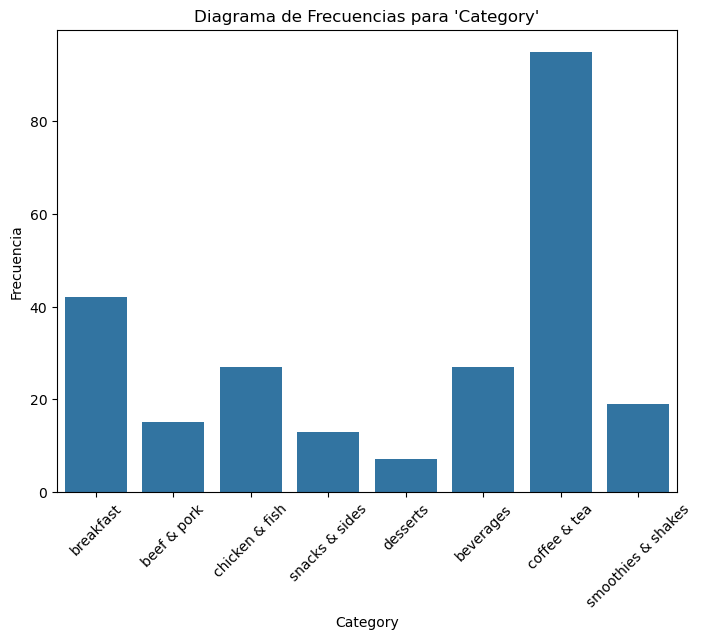

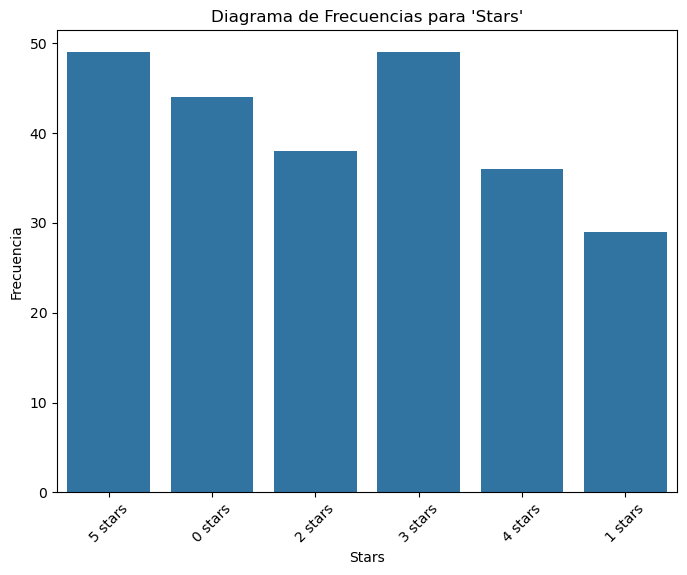

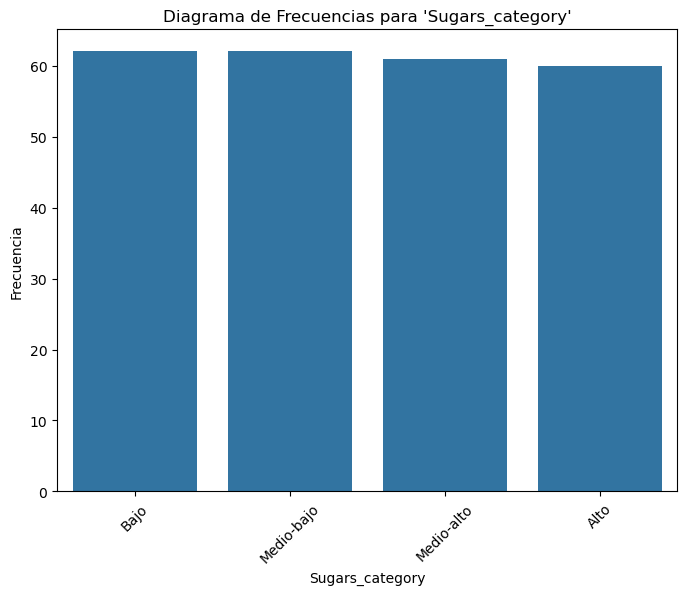

In [121]:
for columna in (columnas_categoricas.drop('Item')):
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df_merge, x=columna)
    plt.title(f"Diagrama de Frecuencias para '{columna}'")
    plt.xlabel(columna)
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45)
    plt.show()

8. Obtener la tabla de contingencia entre 'Category' y la variable discretizada de las Sugars_category. 

In [123]:
# ## TODO
tabla_de_contingencia = pd.crosstab(df_merge['Category'], df_merge['Sugars_category'])

In [124]:
tabla_de_contingencia

Sugars_category,Bajo,Medio-bajo,Medio-alto,Alto
Category,,,,
beef & pork,0,15,0,0
beverages,9,1,10,7
breakfast,25,13,4,0
chicken & fish,8,19,0,0
coffee & tea,10,8,41,36
desserts,0,4,2,1
smoothies & shakes,0,0,3,16
snacks & sides,10,2,1,0


9. La diferencia de azucar entre los ítems de 'Beef&Pork' y "Chicken and fish' es estadísticamente distinta?  

**NOTA**: La selección del test dependerá de si las distribuciones son normales o no.

In [126]:
# En el ejercicio 1.b.2 hemos visto que:
#Test de Shapiro-Wilk para Sugars:
#Estadístico: 0.8822770064831049, p-value: 7.550494257692081e-13
#La distribución de Sugars NO es normal.

In [127]:
# ## TODO
beef_pork = df_merge[df_merge['Category'] == 'beef & pork']
chicken_fish = df_merge[df_merge['Category'] == 'chicken & fish']

In [128]:
stat, p = mannwhitneyu(beef_pork['Sugars'].dropna(), chicken_fish['Sugars'].dropna())
print(f"Resultados del Test de Mann-Whitney U para el azúcar entre Beef & Pork y Chicken & Fish:")
print(f"Estadístico={stat}, p-valor={p}")
if p > 0.05:
    print("No hay diferencias estadísticamente significativas en el azúcar entre los dos grupos.")
else:
    print("Hay diferencias estadísticamente significativas en el azúcar entre los dos grupos.")

Resultados del Test de Mann-Whitney U para el azúcar entre Beef & Pork y Chicken & Fish:
Estadístico=245.0, p-valor=0.26735690832278813
No hay diferencias estadísticamente significativas en el azúcar entre los dos grupos.


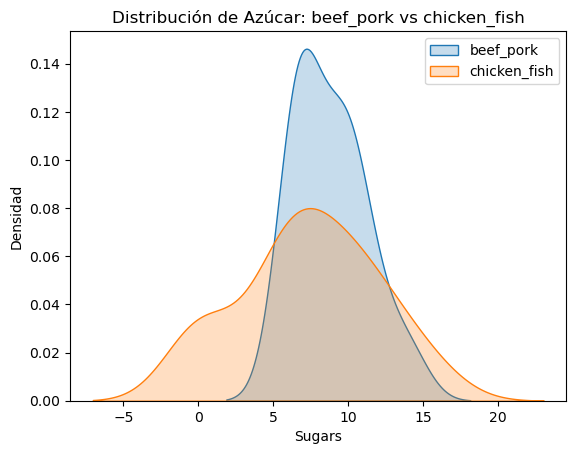

In [129]:
# Si vemos el grafico:
sns.kdeplot(beef_pork['Sugars'], label='beef_pork', fill=True)
sns.kdeplot(chicken_fish['Sugars'], label='chicken_fish', fill=True)
plt.title('Distribución de Azúcar: beef_pork vs chicken_fish')
plt.xlabel('Sugars')
plt.ylabel('Densidad')
plt.legend()
plt.show()
# vemos una distribución realmente diferente

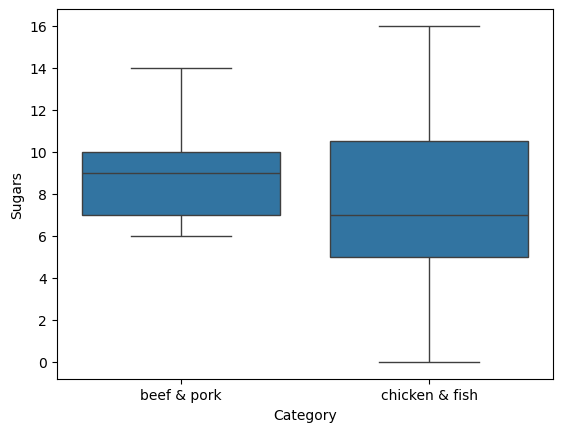

In [130]:
sns.boxplot(data=df_merge[df_merge['Category'].isin(['beef & pork', 'chicken & fish'])],
            x='Category', y='Sugars')
plt.show()

In [131]:
# Bueno, se parecen "mas" que desserts y breakfast, sin embargo, no significa que no hay diferencias
# significa que no hay evidencia de que sean suficientemente grandes, y se ve en el boxplot y el grafico
# que sus cuerpos son parecidos.

10. La diferencia de calorías entre los ítems de 'Beef&Pork' y "Chicken and fish' es estadísticamente distinta?

In [133]:
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu


stat_beef, p_beef = shapiro(beef_pork['Calories'].dropna())
stat_chicken, p_chicken = shapiro(chicken_fish['Calories'].dropna())

print(f"Shapiro-Wilk para Beef & Pork: p-value={p_beef}, estadistico: {stat_beef}")
print(f"Shapiro-Wilk para Chicken & Fish: p-value={p_chicken}, estadistico: {stat_chicken}")

print("El grupo Chicken & Fish no tiene distribucion normal (p < 0.05))")
stat, p = mannwhitneyu(beef_pork['Calories'].dropna(), chicken_fish['Calories'].dropna())
print("Test de Mann-Whitney U (cuando tenemos distribuciónes no normales))")

print(f"Estadístico final={stat}, p-value={p}")
if p > 0.05:
    print("No hay diferencias estadisticamente significativas entre los grupos.")
else:
    print("Hay diferencias estadisticamente significativas entre los grupos.")

Shapiro-Wilk para Beef & Pork: p-value=0.8793575464610012, estadistico: 0.9714814432252464
Shapiro-Wilk para Chicken & Fish: p-value=1.2761811696570101e-06, estadistico: 0.6641229708877094
El grupo Chicken & Fish no tiene distribucion normal (p < 0.05))
Test de Mann-Whitney U (cuando tenemos distribuciónes no normales))
Estadístico final=194.0, p-value=0.8334482617987502
No hay diferencias estadisticamente significativas entre los grupos.


11. El factor categoría afecta en el valor de las calorias (análisis completo)?  

**NOTA**: Aplicar el test correspondiente

In [135]:
from scipy.stats import shapiro


for categoria in df_merge['Category'].unique():
    stat, p = shapiro(df_merge[df_merge['Category'] == categoria]['Calories'].dropna())
    print(f"\nShapiro-Wilk para {categoria}: Estadístico={stat}, p-value={p}")
    if p > 0.05:
        print(f"La distribución de calorías para {categoria} parece normal.")
    else:
        print(f"La distribución de calorías para {categoria} NO es normal.")


Shapiro-Wilk para breakfast: Estadístico=0.8821200786774002, p-value=0.00043806915772840843
La distribución de calorías para breakfast NO es normal.

Shapiro-Wilk para beef & pork: Estadístico=0.9714814432252464, p-value=0.8793575464610012
La distribución de calorías para beef & pork parece normal.

Shapiro-Wilk para chicken & fish: Estadístico=0.6641229708877094, p-value=1.2761811696570101e-06
La distribución de calorías para chicken & fish NO es normal.

Shapiro-Wilk para snacks & sides: Estadístico=0.9505721397373021, p-value=0.6069847068279512
La distribución de calorías para snacks & sides parece normal.

Shapiro-Wilk para desserts: Estadístico=0.9298485550467439, p-value=0.5496122704594217
La distribución de calorías para desserts parece normal.

Shapiro-Wilk para beverages: Estadístico=0.8796353709259793, p-value=0.004717525685918687
La distribución de calorías para beverages NO es normal.

Shapiro-Wilk para coffee & tea: Estadístico=0.9748669443570146, p-value=0.06421304575508

In [136]:
from scipy.stats import kruskal

categorias = [df_merge[df_merge['Category'] == categoria]['Calories'].dropna()
              for categoria in df_merge['Category'].unique()]

stat, p = kruskal(*categorias)

print(f"Test de Kruskal-Wallis: Estadístico={stat}, p-valor={p}")

if p > 0.05:
    print("No hay diferencias estadísticamente significativas entre categorías.")
else:
    print("Hay diferencias significativas en las calorias entre las categorías.")

Test de Kruskal-Wallis: Estadístico=111.63985659572516, p-valor=4.1941336832003195e-21
Hay diferencias significativas en las calorias entre las categorías.


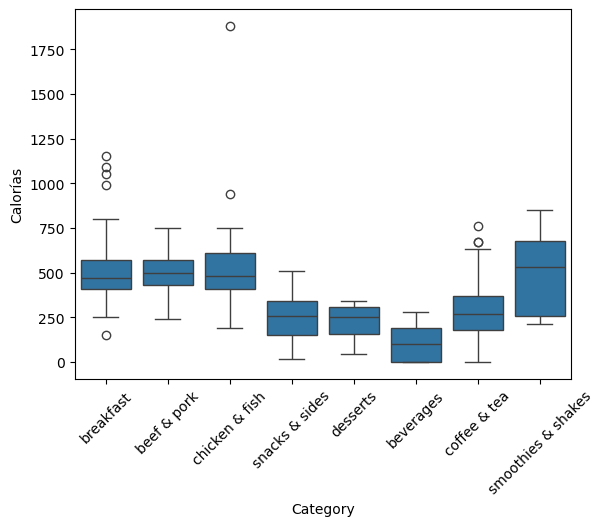

In [137]:
sns.boxplot(data=df_merge, x='Category', y='Calories')
plt.xticks(rotation=45)
plt.ylabel('Calorías')
plt.show()

In [138]:
variabilidad = df_merge.groupby('Category')['Calories'].agg(['var', 'std'])
variabilidad.sort_values(by='var', ascending=False)

,var,std
Category,,
chicken & fish,93967.806268,306.541688
smoothies & shakes,54654.385965,233.782775
breakfast,49596.283391,222.702230
coffee & tea,24797.133259,157.471055
snacks & sides,20099.358974,141.772208
beef & pork,19982.857143,141.360734
desserts,11682.142857,108.083962
beverages,9839.601140,99.194764


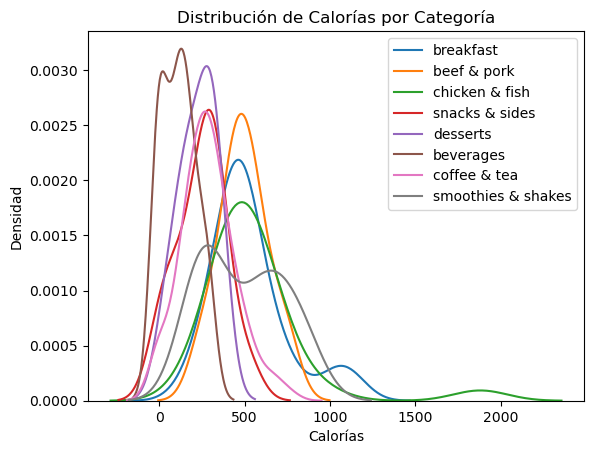

In [139]:
categorias =df_merge['Category'].unique()
for categoria in categorias:
    datos = df_merge[df_merge['Category'] == categoria]['Calories'].dropna()
    sns.kdeplot(datos, label=categoria)
plt.title('Distribución de Calorías por Categoría')
plt.xlabel('Calorías')
plt.ylabel('Densidad')
plt.legend()
plt.show()

In [140]:
# Vemos que,no hay una distribución normal entre varias categorías, lo que hace que el uso del test kruskal-wallis
# esté justificado, el hecho de que p<0.05 indica que hay diferencias. Los graficos lo confirman. Las categorías 
# con mayor variabilidad, son chicken & fish y smoothies & shakes, y las mas cercanas o con menos variabilidad
# son desserts y beverages. En realidad eso indica posiblemente que tienen rangos de calorias mas amplios, y
# algunas categorías son realmente parecidas en el grafico, como coffe & tea y snacks & sides

In [141]:
from scipy.stats import shapiro

# Coffee & Tea
stat_coffee, p_coffee = shapiro(df_merge[df_merge['Category'] == 'coffee & tea']['Calories'].dropna())
print(f"Coffee & Tea: Estadístico={stat_coffee}, p-valor={p_coffee}")

# Snacks & Sides
stat_snacks, p_snacks = shapiro(df_merge[df_merge['Category'] == 'snacks & sides']['Calories'].dropna())
print(f"Snacks & Sides: Estadístico={stat_snacks}, p-valor={p_snacks}")

Coffee & Tea: Estadístico=0.9748669443570146, p-valor=0.06421304575508079
Snacks & Sides: Estadístico=0.9505721397373021, p-valor=0.6069847068279512


In [142]:
from scipy.stats import ttest_ind

stat, p = ttest_ind(
    df_merge[df_merge['Category'] == 'coffee & tea']['Calories'].dropna(),
    df_merge[df_merge['Category'] == 'snacks & sides']['Calories'].dropna()    
)
print(f"T-test: Estadístico={stat}, p-valor={p}")
if p > 0.05:
    print("No hay diferencias significativas entre Coffee & Tea y Snacks & Sides.")
else:
    print("Hay diferencias significativas entre Coffee & Tea y Snacks & Sides.")

T-test: Estadístico=0.8664920742602841, p-valor=0.3881774951459779
No hay diferencias significativas entre Coffee & Tea y Snacks & Sides.


12. Otener el gráfico box-plot en el que se adviertan como se distribuyen los valores de calorías por category.

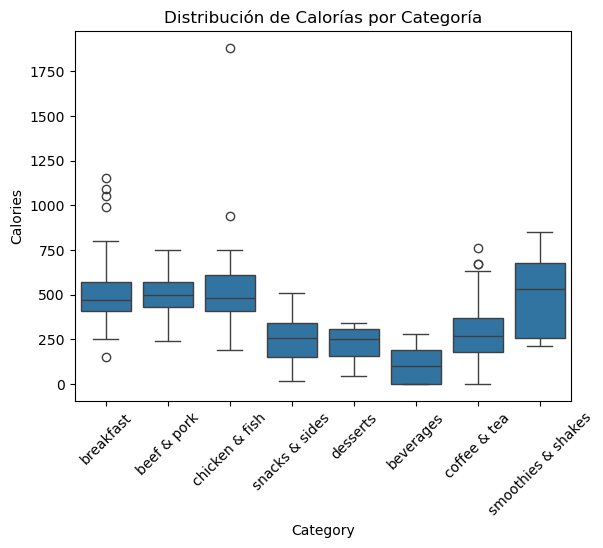

In [144]:
sns.boxplot(x='Category', y='Calories', data=df_merge)
plt.title('Distribución de Calorías por Categoría')
plt.xticks(rotation=45)
plt.show()

### **Parte C.** **Información y Visualizaciones**:

1. ¿Cuantas calorias supone comer la opción con **menos** calorias de la categoría 'breakfast' y de la categoría 'desserts'? 

In [147]:
# ## TODO
min_cal_breakfast = breakfast['Calories'].min()
min_cal_desserts = desserts['Calories'].min()

print(f"Menos cal en Breakfast: {min_cal_breakfast}")
print(f"Menos cal en Desserts: {min_cal_desserts}")

Menos cal en Breakfast: 150.0
Menos cal en Desserts: 45.0


2. ¿De qué items estaríamos hablando?

In [149]:
# ## TODO
item_min_cal_breakfast = breakfast.loc[breakfast['Calories'] == min_cal_breakfast, 'Item'].values[0]
item_min_cal_desserts = desserts.loc[desserts['Calories'] == min_cal_desserts, 'Item'].values[0]

print(f"Ítem con menos cal en 'Breakfast': {item_min_cal_breakfast}")
print(f"Ítem con menos cal en 'Desserts': {item_min_cal_desserts}")


Ítem con menos cal en 'Breakfast': hash brown
Ítem con menos cal en 'Desserts': kids ice cream cone


3. ¿Cuáles son los 10 ítems con más azucar?  

In [151]:
# ## TODO
top_sugar_items = df_merge.nlargest(10, 'Sugars')[['Item', 'Sugars']]

In [152]:
top_sugar_items

,Item,Sugars
240,strawberry shake (large),123.0
243,chocolate shake (large),120.0
237,vanilla shake (large),101.0
239,strawberry shake (medium),100.0
225,frappe chocolate chip (large),99.0
242,chocolate shake (medium),97.0
244,shamrock shake (medium),93.0
219,frappe mocha (large),88.0
222,frappe caramel (large),88.0
224,frappe chocolate chip (medium),81.0


4. Representa en un diagrama de barras la cantidad de azucar de estos 7 items, ordenadas de mayor a menor.

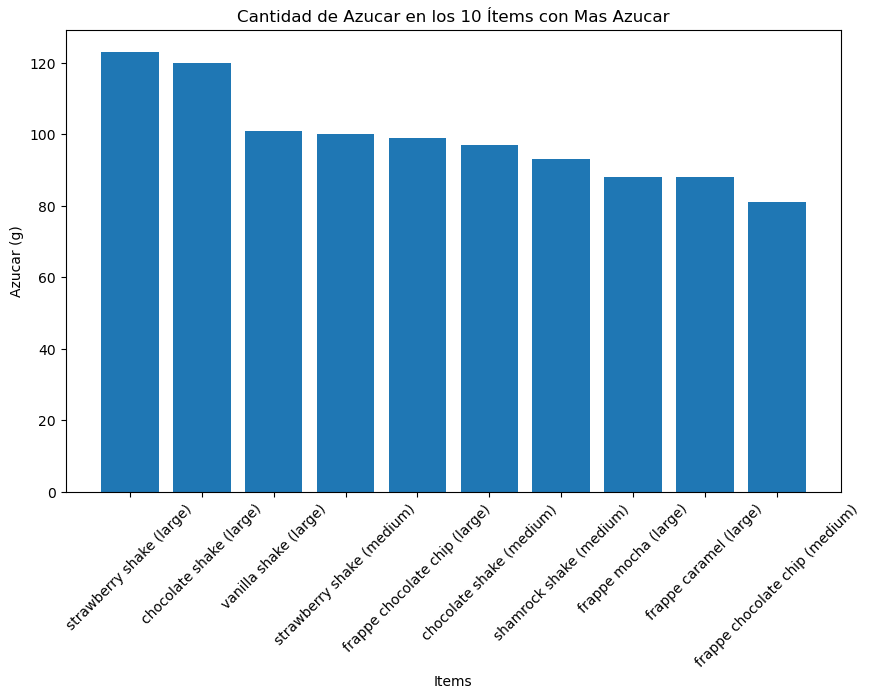

In [154]:
# ## TODO
plt.figure(figsize=(10, 6))
plt.bar(top_sugar_items['Item'], top_sugar_items['Sugars'])
plt.xticks(rotation=45)
plt.title('Cantidad de Azucar en los 10 Ítems con Mas Azucar')
plt.xlabel('Items')
plt.ylabel('Azucar (g)')
plt.show()

5. ¿Qué categoría presenta en media más estrellas (stars)?  

Representa en un mismo gráfico:  

1) Diagrama de barras del número medio de reviews por categoria  
2) Plot lineas con el número médio de estrellas.  

Se solicita que se use un gráfico de dos ejes, uno para cada variable indicada.  

**NOTA**: Previamente a la visualización, se deberá convertir en variable numérica las 'Stars', eliminando el texto.

**TIP**: https://www.analyticslane.com/2022/08/04/uso-de-multiples-ejes-en-matplotlib/

In [157]:
# ## TODO
df_merge['Stars'] = df_merge['Stars'].str.extract(r'(\d+)').astype(float)
stars_reviews = df_merge.groupby('Category').agg(mean_stars=('Stars', 'mean'), mean_reviews=('Reviews', 'mean'))

In [158]:
stars_reviews

,mean_stars,mean_reviews
Category,,
beef & pork,2.000000,415.400000
beverages,3.074074,566.592593
breakfast,2.452381,518.785714
chicken & fish,2.777778,528.481481
coffee & tea,2.589474,558.684211
desserts,2.857143,547.428571
smoothies & shakes,2.526316,447.947368
snacks & sides,2.769231,535.846154


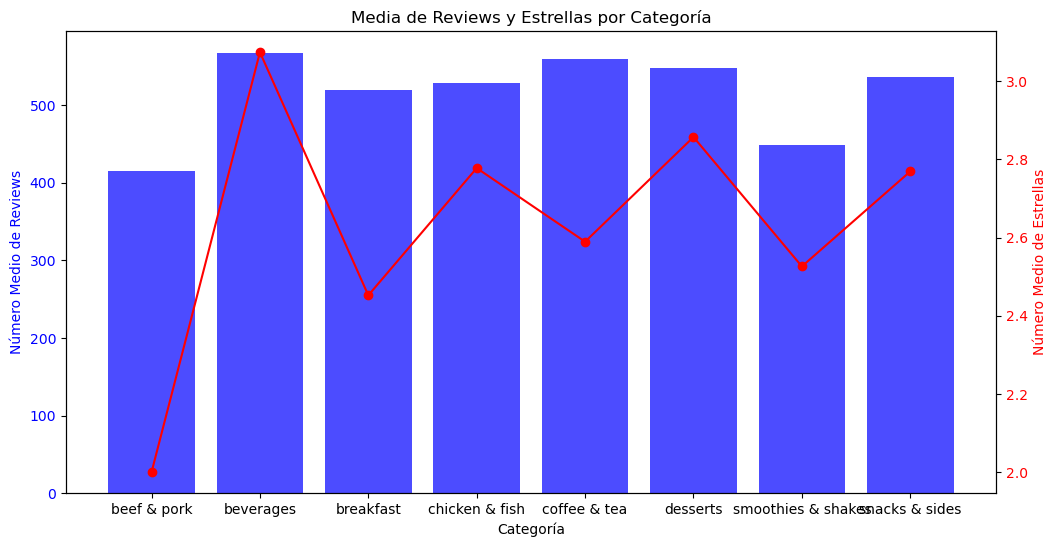

In [159]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(stars_reviews.index, stars_reviews['mean_reviews'], color='blue', alpha=0.7, label='Reviews')
ax1.set_xlabel('Categoría')
ax1.set_ylabel('Número Medio de Reviews', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Media de Reviews y Estrellas por Categoría')

ax2 = ax1.twinx()
ax2.plot(stars_reviews.index, stars_reviews['mean_stars'], color='red', marker='o', label='Stars')
ax2.set_ylabel('Número Medio de Estrellas', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.xticks(rotation=45, ha='right')
plt.show()

6. Crea un dataframe que muestre para cada categoria una columna con el ítem con más colesterol y el ítem con menos colesterol. Este dataframe tendrà tres columnas: [Categoría, item_max_cholesterol, item_min_cholesterol]

In [161]:
resultados = []
for categoria in df_merge['Category'].unique():
    subgrupo = df_merge[df_merge['Category'] == categoria]
    max_colesterol_linea = subgrupo.loc[subgrupo['Cholesterol'].idxmax()]
    max_colesterol_item = max_colesterol_linea['Item']
    min_colesterol_linea = subgrupo.loc[subgrupo['Cholesterol'].idxmin()]
    min_colesterol_item = min_colesterol_linea['Item']
    resultados.append({
        'Category': categoria,
        'item_max_cholesterol': max_colesterol_item,
        'item_min_cholesterol': min_colesterol_item
    })
colesterol_df = pd.DataFrame(resultados)

In [162]:
colesterol_df

,Category,item_max_cholesterol,item_min_cholesterol
0,breakfast,big breakfast with hotcakes (regular biscuit),hash brown
1,beef & pork,double quarter pounder with cheese,hamburger
2,chicken & fish,chicken mcnuggets (40 piece),chicken mcnuggets (4 piece)
3,snacks & sides,honey mustard snack wrap (grilled chicken),small french fries
4,desserts,hot caramel sundae,baked apple pie
5,beverages,1% low fat milk jug,coca-cola classic (small)
6,coffee & tea,frappe caramel (large),iced tea (small)
7,smoothies & shakes,vanilla shake (large),blueberry pomegranate smoothie (small)


7. Análisis de variables  

7.1. Crea un grafico tipo scatterplot para representar la relación entre Sodium vs Total Fat. 

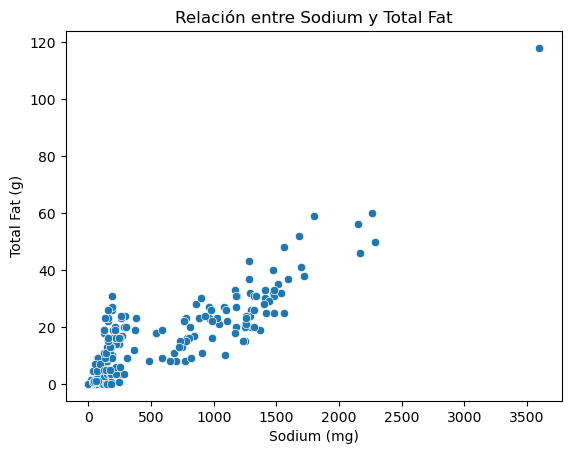

In [164]:
# ## TODO
import seaborn as sns


sns.scatterplot(data=df_merge, x='Sodium', y='Total Fat')
plt.title('Relación entre Sodium y Total Fat')
plt.xlabel('Sodium (mg)')
plt.ylabel('Total Fat (g)')
plt.show()

7.1 ¿Adviertes alguna tendencia? Cómo interpretas el gráfico. 

In [166]:
# ## RESPONDER: La tendencia es una correlación positiva ya que los puntos se situan en diagonal 
# entonces se podría decir que a mayor sodio, mas cantidad de grasa total. Ademas hay un outlier
# pero que también est'a correlaciónado

7.2. Repite el mismo gráfico pero diferenciando por colores los valores correspondientes a cada categoria.  

¿Cómo interpretas el gráfico?

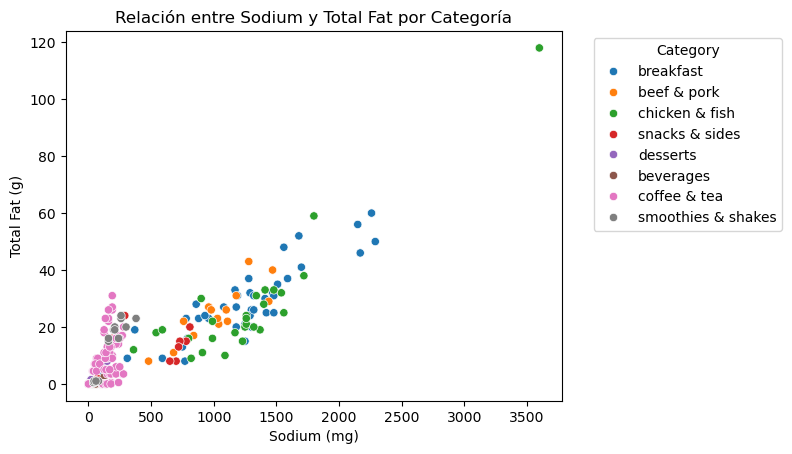

In [168]:
# ## TODO
sns.scatterplot(data=df_merge, x='Sodium', y='Total Fat', hue='Category')
plt.title('Relación entre Sodium y Total Fat por Categoría')
plt.xlabel('Sodium (mg)')
plt.ylabel('Total Fat (g)')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [169]:
# Aqui puedo observar que para el cafe y te, no hay correlacción, tampoco para snacks & sides. En general
# observo que, cuando se mira por categoria, la correlacion no lo es en todas las categorías, es sobretodo
# en breakfast, chicken & fish y beef & pork

8. Repite el mismo gráfico que en el punto anterior pero para las variables Protein y Total Fat.  

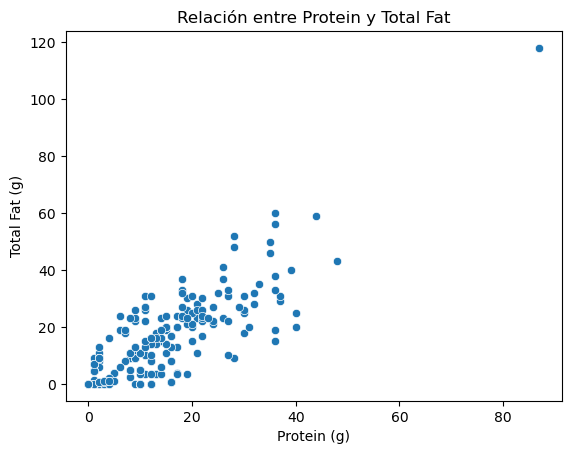

In [171]:
# ## TODO
sns.scatterplot(data=df_merge, x='Protein', y='Total Fat')
plt.title('Relación entre Protein y Total Fat')
plt.xlabel('Protein (g)')
plt.ylabel('Total Fat (g)')
plt.show()

9. ¿Adviertes alguna relación? ¿Cómo interpretas los gráficos?

In [173]:
# ## RESPONDER
# Tenemos un outlier pero se ve una correlacion positiva entre total fat y protein, siendo mas uno, lo es el otro

## Ejercicio 2

En esta parte de la PEC, vamos a utilizar la adaptación de un dataset que recoge más de 1400 respuestas a una encuesta cuyo objetivo es evaluar la salud mental de los trabajadores en su lugar de trabajo. Las columnas del dataset son las siguientes:

- 'Age',
- 'Gender',
- 'Country',
- 'State',
- 'self_employed' (si es autónomo),
- 'family_history' (si hay algún familiar que padece problemas de salud mental),
- 'treatment' (Si ha recibido tratamiento para su salud mental),
- 'work_interfere' (tu condición de salud mental notas que afecta a tu trabajo),
- 'size_employees' (categoría de empresa según su tamaño y número de empleados),
- 'remote_work' (si realiza trabajo remoto),
- 'tech_company' (si la compañia es del sector tecnológico),
- 'benefits' (si la empresa hace acciones en beneficio de la salud mental),
- 'care_options' (si conoce las opciones para cuidar la salud mental que ofrece la empresa),
- 'wellness_program' (si la empresa dispone de un programa para el bienestar),
- 'seek_help'(si la empresa proporciona herramientas para poder buscar y encontrar ayuda en cuanto a salud mental),
- 'anonymity' (si la empresa guarda el anonimato si se disfruta de los beneficios relativos a salud mental),
- 'mental_health_consequence' (si piensa que hablar de problemas de salud mental podría tener consecuencias en las condiciones de trabajo),
- 'phys_health_consequence' (si piensa que hablar de problemas de salud no-mental podría tener consecuencias en las condiciones de trabajo),
- 'coworkers' (si hablaría de los problemas de salud mental con sus compañeros),
- 'supervisor' (si hablaría de sus problemas con su supervisor)


Con este dataset, además de preparar los datos, vamos a plantear qué tipo de problema (regresión o clasificación) podríamos resolver con el dataset preparado. 


**Parte A.** Como primer paso se solicita evaluar las variables del dataset y prepararlas según las especificaciones planteadas:

1. Cargar el dataset e indicar el tipo de dato que es cada columna. 

In [178]:
# ## TODO
df_survey= pd.read_csv("2024_01/survey_16.csv")

In [179]:
df_survey.dtypes

Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
size_employees                int64
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
dtype: object

In [180]:
df_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1259 non-null   int64 
 1   Gender                     1259 non-null   object
 2   Country                    1259 non-null   object
 3   state                      744 non-null    object
 4   self_employed              1241 non-null   object
 5   family_history             1259 non-null   object
 6   treatment                  1259 non-null   object
 7   work_interfere             995 non-null    object
 8   size_employees             1259 non-null   int64 
 9   remote_work                1259 non-null   object
 10  tech_company               1259 non-null   object
 11  benefits                   1259 non-null   object
 12  care_options               1259 non-null   object
 13  wellness_program           1259 non-null   object
 14  seek_hel

In [181]:
df_survey.describe(include='all')

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,size_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,mental_health_consequence,phys_health_consequence,coworkers,supervisor
count,1.259000e+03,1259,1259,744,1241,1259,1259,995,1259.000000,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259
unique,NaN,49,48,45,2,2,2,4,NaN,2,2,3,3,3,3,3,3,3,3,3
top,NaN,Male,United States,CA,No,No,Yes,Sometimes,NaN,No,Yes,Yes,No,No,No,Don't know,No,No,Some of them,Yes
freq,NaN,615,751,138,1095,767,637,465,NaN,883,1031,477,501,842,646,819,490,925,774,516
mean,7.942815e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.419380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.818299e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.708151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,-1.726000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.700000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.100000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3.600000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [182]:
df_survey

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,size_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,mental_health_consequence,phys_health_consequence,coworkers,supervisor
0,37,Female,United States,IL,NaN,No,Yes,Often,2,No,Yes,Yes,Not sure,No,Yes,Yes,No,No,Some of them,Yes
1,44,M,United States,IN,NaN,No,No,Rarely,6,No,No,Don't know,No,Don't know,Don't know,Don't know,Maybe,No,No,No
2,32,Male,Canada,NaN,NaN,No,No,Rarely,2,No,Yes,No,No,No,No,Don't know,No,No,Yes,Yes
3,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,3,No,Yes,No,Yes,No,No,No,Yes,Yes,Some of them,No
4,31,Male,United States,TX,NaN,No,No,Never,4,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,No,No,Some of them,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,male,United Kingdom,NaN,No,No,Yes,NaN,3,No,Yes,No,No,No,No,Don't know,No,No,Some of them,Some of them
1255,32,Male,United States,IL,No,Yes,Yes,Often,3,Yes,Yes,Yes,Yes,No,No,Yes,No,No,Some of them,Yes
1256,34,male,United States,CA,No,Yes,Yes,Sometimes,6,No,Yes,Yes,Yes,No,No,Don't know,Yes,Yes,No,No
1257,46,f,United States,NC,No,No,No,NaN,4,Yes,Yes,No,Yes,No,No,Don't know,Yes,No,No,No


2.	Especificaciones para preparar las variables:  

2.1. Age: Poner a NAN los valores que sean anómalos (valores negativos, valores irreales (>=120 años),…)

**NOTA**: Se recomienda emplear una función para ello

In [184]:
# ## TODO
def limpiar_edad(age):
    """Funcion para limpiar valores de Age."""
    if age < 0 or age >= 120:
        return np.nan
    return age

In [185]:
df_survey['Age'] = df_survey['Age'].apply(limpiar_edad)

2.2. Eliminar las  variables Country y State

In [187]:
# ## TODO
df_survey.drop(columns=['Country', 'state'], inplace=True)

2.3. Gender: codificar el gérero de acuerdo a las siguientes consideraciones:
  - Valores que hagan referencia a mujer: 1
  - Valores que hagan referencia a hombre: 0
  - El resto de valores: 2
  
 **Nota**: Se recomienda obtener los valores únicos que identifican a Hombre y Mujer, así como emplear una función para optimizar el proceso de codificación

In [189]:
df_survey['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [190]:
def codificar_genero(gender):
    gender = str(gender).lower()
    if any(palabra in gender for palabra in ["female", "woman",
                                               "f", "cis female",
                                               "femail", "femake",
                                               "cis-female/femme",
                                               "female (cis)", "1"]):
        return 1
    elif any(palabra in gender for palabra in ["male", "man", "m",
                                             "cis male", "msle",
                                             "male (cis)", "msle",
                                             "cis male", "malr",
                                             "mail", "cis man", "0"]):
        return 0
    else:
        return 2


df_survey['Gender'] = df_survey['Gender'].apply(codificar_genero)

In [191]:
print(df_survey['Gender'].value_counts())

Gender
0    994
1    252
2     13
Name: count, dtype: int64


2.4. - Binarizar las siguientes variables de acuerdo a la codificación: Yes=1; No=0; el resto=NAN  
  -	Self_employed  
  -	Family_history  
  -	Treatment    
  -	Remote_work  
  -	Tech_company  
  -	Benefits  
  -	Care_options  
  -	Wellness_program  
  -	Seek_help  
  -	Anonymity  
  -	Mental_health_consequence  
  -	Coworkers  
  -	Supervisor  

In [193]:
# ## TODO
columnas_a_binarizar = [
    'self_employed', 'family_history', 'treatment', 'remote_work', 'tech_company',
    'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity',
    'mental_health_consequence', 'coworkers', 'supervisor','phys_health_consequence'
]

for col in columnas_a_binarizar:
    nueva_columna = []
    for valor in df_survey[col]:
        if valor == 'Yes':
            nueva_columna.append(1)
        elif valor == 'No':
            nueva_columna.append(0)
        else:
            nueva_columna.append(np.nan)
    df_survey[col] = nueva_columna

2.5. Convertir en variable ordinal la variable work_interfere, asignando valores del 0 al 3, de acuerdo con la frecuencia. A los valores que tengan un valor NAN, mantener su valor a NAN.

- Never = 0
- Rarely = 1
- Often = 2
- Sometimes = 3

In [195]:
# ## TODO
work_interfere_map = {'Never': 0, 'Rarely': 1, 'Often': 2, 'Sometimes': 3}
df_survey['work_interfere'] = df_survey['work_interfere'].map(work_interfere_map)

In [196]:
df_survey

,Age,Gender,self_employed,family_history,treatment,work_interfere,size_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,mental_health_consequence,phys_health_consequence,coworkers,supervisor
0,37.0,1,NaN,0,1,2.0,2,0,1,1.0,NaN,0.0,1.0,1.0,0.0,0.0,NaN,1.0
1,44.0,0,NaN,0,0,1.0,6,0,0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2,32.0,0,NaN,0,0,1.0,2,0,1,0.0,0.0,0.0,0.0,NaN,0.0,0.0,1.0,1.0
3,31.0,0,NaN,1,1,2.0,3,0,1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,NaN,0.0
4,31.0,0,NaN,0,0,0.0,4,1,1,1.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26.0,0,0.0,0,1,NaN,3,0,1,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN
1255,32.0,0,0.0,1,1,2.0,3,1,1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,1.0
1256,34.0,0,0.0,1,1,3.0,6,0,1,1.0,1.0,0.0,0.0,NaN,1.0,1.0,0.0,0.0
1257,46.0,1,0.0,0,0,NaN,4,1,1,0.0,1.0,0.0,0.0,NaN,1.0,0.0,0.0,0.0


In [197]:
df_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1254 non-null   float64
 1   Gender                     1259 non-null   int64  
 2   self_employed              1241 non-null   float64
 3   family_history             1259 non-null   int64  
 4   treatment                  1259 non-null   int64  
 5   work_interfere             995 non-null    float64
 6   size_employees             1259 non-null   int64  
 7   remote_work                1259 non-null   int64  
 8   tech_company               1259 non-null   int64  
 9   benefits                   851 non-null    float64
 10  care_options               945 non-null    float64
 11  wellness_program           1071 non-null   float64
 12  seek_help                  896 non-null    float64
 13  anonymity                  440 non-null    float

3. Eliminar todas las filas que tengan almenos un valor a NAN

In [199]:
# ## TODO
df_survey.dropna(inplace=True)

In [200]:
df_survey

,Age,Gender,self_employed,family_history,treatment,work_interfere,size_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,mental_health_consequence,phys_health_consequence,coworkers,supervisor
39,35.0,0,0.0,0,1,1.0,6,1,1,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
77,31.0,0,1.0,1,0,3.0,1,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
91,40.0,0,0.0,0,1,3.0,3,0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
99,30.0,0,0.0,0,1,2.0,1,0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
100,26.0,1,0.0,1,1,3.0,3,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168,26.0,0,0.0,0,0,2.0,2,0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1172,40.0,1,0.0,1,1,3.0,3,0,1,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
1219,38.0,0,0.0,0,1,3.0,6,1,1,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
1230,23.0,1,0.0,1,1,3.0,2,0,1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0


**Parte B.** Planteamiento del problema y del modelo

El objetivo que se quiere conseguir con el modelo es, a partir de las variables disponibles en el dataset, ser capaces de predecir si la persona está en tratamiento o no. Por tanto, las entradas serán los valores de todas las variables excepto ‘Treatment'; y la salida será la variable ‘Treatment'.

1. ¿Qué problema queremos resolver, de clasificación o de regresión? Justifícalo.

In [204]:
# ## RESPONDER
# Queremos clasificar una variable binaria, podemos usar modelos de arboles de decisin, redes neuronales, y regresion logistica,
# que si bien es un metodo numerico, clasifica entre proximo a 1 o proximo a 0
# lo que me parece muy bueno de la regresion logistica es su explicabilidad, fundamental en el sector de salud, y que pronostica y da una
# probabilídad, que tan lejos esta de 0 y 1.

![Foto del post de linkedIn](https://media.licdn.com/dms/image/v2/D4E22AQFTaX-1L39L5A/feedshare-shrink_2048_1536/feedshare-shrink_2048_1536/0/1725738448862?e=1735776000&v=beta&t=BjCZGdgWy03eIj3IakgZIol9drO7p4qMfyNT5Iybggg)

##### No me gustan los modelos con menos explicabilidad en entornos donde debes poder explicar porqué es así:
https://www.linkedin.com/posts/javieracebalrico_in-machine-learning-its-crucial-to-strike-ugcPost-7240065113569845248-1Uq6?utm_source=share&utm_medium=member_desktop

2. A continuación, se facilitan dos códigos para entrenar un posible modelo. Completa los #TODO y ejecuta el que corresponda según tu respuesta a la pregunta anterior de si es un problema de regresión o de clasificación.  

NOTA: como la fase de obtención de modelos está fuera del contenido de esta asignatura y en este ejercicio vamos a abordar el modelado de una forma muy sencilla y sin fijarnos en las métricas de bondad de ajuste, no llevaremos a cabo los procesos de training y test propios de un proceso de modelado

In [208]:
# CÓDIGO MODELO REGRESIÓN

from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression
# definir entrada-salida
X = df_survey[['Age', 'Gender']].values
y = df_survey['treatment'].values

# Definir el tipo de modelo
model_r = LinearRegression()
# Ajustar el modelo a todo dataset
model_r.fit(X, y)

LinearRegression()

In [209]:
# CÓDIGO MODELO CLASIFICACIÓN

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
# definir entrada-salida
X=df_survey[['Age','Gender']].values
y=df_survey[['treatment']].values
y = y.ravel()
# Definir el tipo de modelo
model = LogisticRegression(multi_class='multinomial', solver='lbfgs',  random_state=0)
# Ajustar el modelo a todo dataset
model.fit(X, y)

LogisticRegression(multi_class='multinomial', random_state=0)

In [210]:
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1])

In [211]:
# ## TODO
df_survey.columns

Index(['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'size_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'mental_health_consequence', 'phys_health_consequence',
       'coworkers', 'supervisor'],
      dtype='object')

3. Una vez ajustado el modelo, contestar a si una persona que haya respondido de la siguiente forma a la encuesta, estará recibiendo tratamiento:

- 'Age': 39,  
- 'Gender': 1,
- 'self_employed': 0,
- 'family_history': 0,
- 'work_interfere': 0,
- 'size_employees': 1,
- 'remote_work': 1,
- 'tech_company': 1,
- 'benefits': 1,
- 'care_options': 1,
- 'wellness_program': 1,
- 'seek_help': 0,
- 'anonymity': 0,
- 'mental_health_consequence': 0,
- 'phys_health_consequence': 0,
- 'coworkers': 1,
- 'supervisor': 0,





In [213]:
variables_modelo = ['Age', 'Gender', 'self_employed', 'family_history', 'work_interfere', 
                    'size_employees', 'remote_work', 'tech_company', 'benefits', 
                    'care_options', 'wellness_program', 'seek_help', 'anonymity', 
                    'mental_health_consequence', 'phys_health_consequence', 'coworkers', 
                    'supervisor']
df_survey2 = df_survey.dropna(subset=variables_modelo)

In [214]:
print("Filas antes de eliminar NaN:", df_survey.shape[0])
print("Filas después de eliminar NaN:", df_survey2.shape[0])

Filas antes de eliminar NaN: 63
Filas después de eliminar NaN: 63


In [215]:
X=df_survey2[variables_modelo].values
y=df_survey2[['treatment']].values


In [216]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y = y.ravel()

model = LogisticRegression(
    multi_class='multinomial', 
    solver='lbfgs', 
    random_state=0
)
model.fit(X_scaled, y)

LogisticRegression(multi_class='multinomial', random_state=0)

In [217]:
X_scaled

array([[ 0.19072975, -0.41635614, -0.53452248, ..., -0.38138504,
         0.73251987,  0.65712874],
       [-0.28515041, -0.41635614,  1.87082869, ..., -0.38138504,
         0.73251987,  0.65712874],
       [ 0.78557994, -0.41635614, -0.53452248, ..., -0.38138504,
         0.73251987,  0.65712874],
       ...,
       [ 0.54763986, -0.41635614, -0.53452248, ..., -0.38138504,
         0.73251987,  0.65712874],
       [-1.23691073,  1.96822903, -0.53452248, ..., -0.38138504,
         0.73251987,  0.65712874],
       [-0.99897065, -0.41635614, -0.53452248, ..., -0.38138504,
         0.73251987,  0.65712874]])

In [218]:
tabla_conteo = df_survey.groupby(['Gender', 'treatment']).size().unstack(fill_value=0)
tabla_conteo.index = ['Masculino', 'Femenino', 'Otros'] 
tabla_conteo.columns = ['No Tratamiento', 'Tratamiento']
# Vemos que no tiene sentido diferenciar por sexo ya que nos faltan datos en el genero femenino
# para que la clasificación sea válida:
print("Tabla de conteos desglosada por género y tratamiento:")
print(tabla_conteo)

Tabla de conteos desglosada por género y tratamiento:
           No Tratamiento  Tratamiento
Masculino              17           36
Femenino                0            9
Otros                   0            1


In [219]:
nueva_persona = {
    'Age': 39,
    'Gender': 1,
    'self_employed': 0,
    'family_history': 0,
    'work_interfere': 0,
    'size_employees': 1,
    'remote_work': 1,
    'tech_company': 1,
    'benefits': 1,
    'care_options': 1,
    'wellness_program': 1,
    'seek_help': 0,
    'anonymity': 0,
    'mental_health_consequence': 0,
    'phys_health_consequence': 0,
    'coworkers': 1,
    'supervisor': 0
}
nueva_persona_df = pd.DataFrame([nueva_persona])
nueva_persona_escalada = scaler.transform(nueva_persona_df[variables_modelo].values)
nueva_prediccion = model.predict_proba(nueva_persona_escalada)[:, 1][0]
print(f"Probabilidad de tratamiento para la nueva persona: {nueva_prediccion:.2f}")

Probabilidad de tratamiento para la nueva persona: 0.63


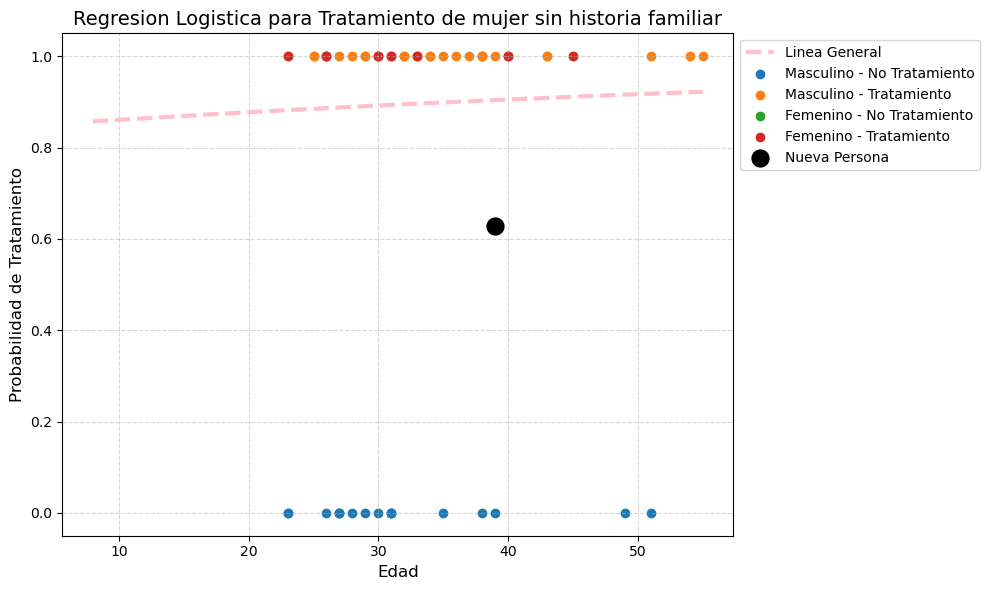

In [220]:
# promedios para dibujar una linea de separación 
promedios = df_survey2[variables_modelo].drop(columns=['Age']).mean()

plt.figure(figsize=(10, 6))

# linea de separación (no se si se llama correctamente de regresion)
# sin embargo da un acercamiento a segun la edad, saber si puede parecer enfermedad
# entonces para cada edad, hay una prediccion
rango_edades = np.linspace(df_survey2['Age'].min(), df_survey2['Age'].max(), 50)
X_plot_general = pd.DataFrame({ 
    'Age': rango_edades,
    **{col: promedios[col] for col in promedios.index} 
})
X_plot_general_escalado = scaler.transform(X_plot_general[variables_modelo].values)
prediccion_general = model.predict_proba(X_plot_general_escalado)[:, 1]
plt.plot(rango_edades, prediccion_general, color='pink', linewidth=3, linestyle='--', label='Linea General')
generos = {0: 'Masculino', 1: 'Femenino'}
for genero, etiqueta_genero in generos.items():
    for tratamiento in [0, 1]:
        subconjunto = df_survey2[(df_survey2['Gender'] == genero) & (df_survey2['treatment'] == tratamiento)]
        etiqueta_tratamiento = 'No Tratamiento' if tratamiento == 0 else 'Tratamiento'
        # para cada subcojunto de genero y tratamiento, dibujo un color y etiqueta
        plt.scatter(subconjunto['Age'], subconjunto['treatment'],
                    label=f'{etiqueta_genero} - {etiqueta_tratamiento}')

# nueva persona
plt.scatter(nueva_persona_df['Age'], nueva_prediccion, c='black', label='Nueva Persona', s=200, edgecolors='white')

plt.title('Regresion Logistica para Tratamiento de mujer sin historia familiar', fontsize=14)
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Probabilidad de Tratamiento', fontsize=12)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

4. Qué pasa si la misma persona se lo piensa dos veces y modifica su respuesta en el siguiente parámetro?

- 'family_history': 1


In [222]:
# ## TODO
nueva_persona['family_history'] = 1
nueva_persona_df = pd.DataFrame([nueva_persona])
nueva_persona_escalada = scaler.transform(nueva_persona_df[variables_modelo].values)
nueva_prediccion = model.predict_proba(nueva_persona_escalada)[:, 1][0]
print(f"Probabilidad de tratamiento para la nueva persona: {nueva_prediccion:.2f}")

Probabilidad de tratamiento para la nueva persona: 0.81


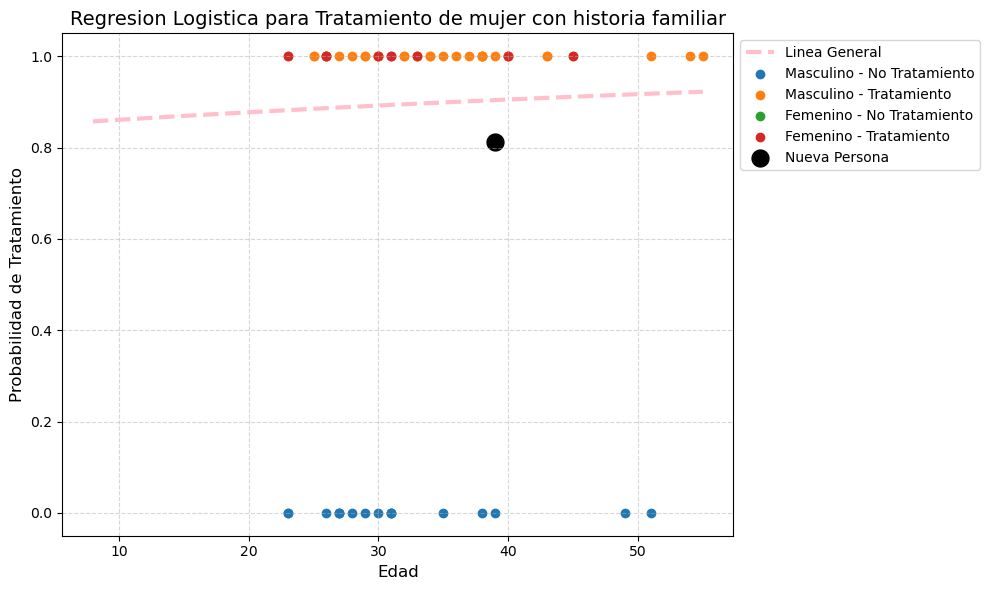

In [223]:
# promedios para dibujar una linea de separación 
promedios = df_survey2[variables_modelo].drop(columns=['Age']).mean()

plt.figure(figsize=(10, 6))

# linea de separación (no se si se llama correctamente de regresion)
# sin embargo da un acercamiento a segun la edad, saber si puede parecer enfermedad
# entonces para cada edad, hay una prediccion
rango_edades = np.linspace(df_survey2['Age'].min(), df_survey2['Age'].max(), 50)
X_plot_general = pd.DataFrame({ 
    'Age': rango_edades,
    **{col: promedios[col] for col in promedios.index} 
})
X_plot_general_escalado = scaler.transform(X_plot_general[variables_modelo].values)
prediccion_general = model.predict_proba(X_plot_general_escalado)[:, 1]
plt.plot(rango_edades, prediccion_general, color='pink', linewidth=3, linestyle='--', label='Linea General')

for genero, etiqueta_genero in generos.items():
    for tratamiento in [0, 1]:
        subconjunto = df_survey2[(df_survey2['Gender'] == genero) & (df_survey2['treatment'] == tratamiento)]
        etiqueta_tratamiento = 'No Tratamiento' if tratamiento == 0 else 'Tratamiento'
        # para cada subcojunto de genero y tratamiento, dibujo un color y etiqueta
        plt.scatter(subconjunto['Age'], subconjunto['treatment'],
                    label=f'{etiqueta_genero} - {etiqueta_tratamiento}')

# nueva persona
plt.scatter(nueva_persona_df['Age'], nueva_prediccion, c='black', label='Nueva Persona', s=200, edgecolors='white')

plt.title('Regresion Logistica para Tratamiento de mujer con historia familiar', fontsize=14)
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Probabilidad de Tratamiento', fontsize=12)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [224]:
# sube del 63% al 81%, y, ¿si fuera hombre?

In [225]:
nueva_persona['Gender'] = 0
nueva_persona['family_history'] = 0

nueva_persona_df = pd.DataFrame([nueva_persona])
nueva_persona_escalada = scaler.transform(nueva_persona_df[variables_modelo].values)
nueva_prediccion = model.predict_proba(nueva_persona_escalada)[:, 1][0]
print(f"Probabilidad de tratamiento para la nueva persona: {nueva_prediccion:.2f}")

Probabilidad de tratamiento para la nueva persona: 0.10


In [226]:
# y, ¿siendo hombre pero con historia de tratamiento?

In [227]:
nueva_persona['Gender'] = 0
nueva_persona['family_history'] = 1

nueva_persona_df = pd.DataFrame([nueva_persona])
nueva_persona_escalada = scaler.transform(nueva_persona_df[variables_modelo].values)
nueva_prediccion = model.predict_proba(nueva_persona_escalada)[:, 1][0]
print(f"Probabilidad de tratamiento para la nueva persona: {nueva_prediccion:.2f}")

Probabilidad de tratamiento para la nueva persona: 0.22


In [228]:
# queda claro que ser mujer es un factor de riesgo muy importante, que si hicieramos el estudio sin tener en cuenta
# el sexo, estaría sesgado en favor de la no enfermedad del género masculino, eliminemosles Gender

In [229]:
variables_modelo.remove('Gender')

In [230]:
df_survey2 = df_survey.dropna(subset=variables_modelo)
X=df_survey2[variables_modelo].values
y=df_survey2[['treatment']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y = y.ravel()

model = LogisticRegression(
    multi_class='multinomial', 
    solver='lbfgs', 
    random_state=0
)
model.fit(X_scaled, y)

LogisticRegression(multi_class='multinomial', random_state=0)

In [231]:
del nueva_persona['Gender']

In [232]:
nueva_persona_df = pd.DataFrame([nueva_persona])
nueva_persona_escalada = scaler.transform(nueva_persona_df[variables_modelo].values)
nueva_prediccion = model.predict_proba(nueva_persona_escalada)[:, 1][0]
print(f"Probabilidad de tratamiento para la nueva persona: {nueva_prediccion:.2f}")

Probabilidad de tratamiento para la nueva persona: 0.31


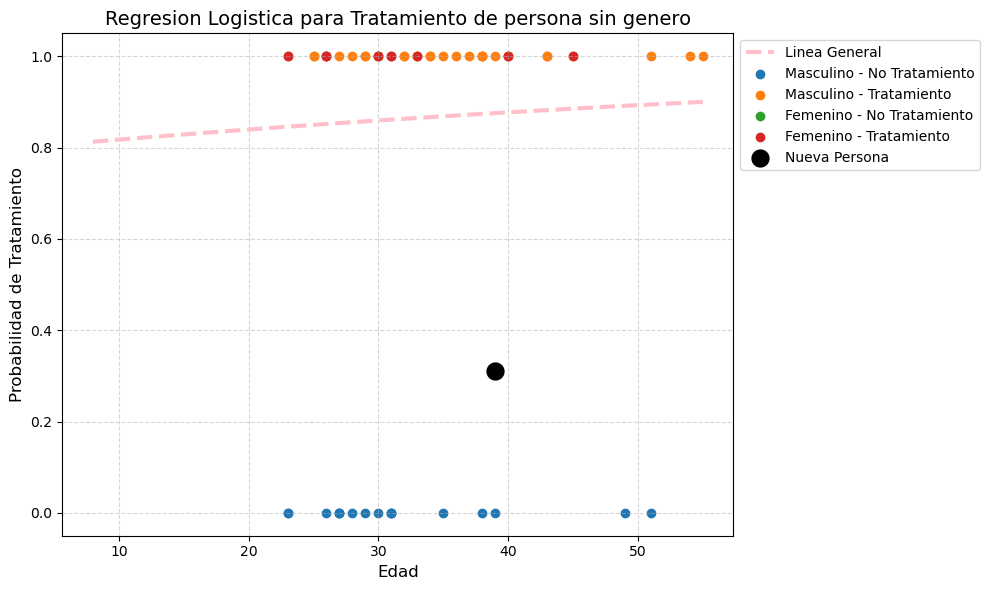

In [233]:
# promedios para dibujar una linea de separación 
promedios = df_survey2[variables_modelo].drop(columns=['Age']).mean()

plt.figure(figsize=(10, 6))

# linea de separación (no se si se llama correctamente de regresion)
# sin embargo da un acercamiento a segun la edad, saber si puede parecer enfermedad
# entonces para cada edad, hay una prediccion
rango_edades = np.linspace(df_survey2['Age'].min(), df_survey2['Age'].max(), 50)
X_plot_general = pd.DataFrame({ 
    'Age': rango_edades,
    **{col: promedios[col] for col in promedios.index} 
})
X_plot_general_escalado = scaler.transform(X_plot_general[variables_modelo].values)
prediccion_general = model.predict_proba(X_plot_general_escalado)[:, 1]
plt.plot(rango_edades, prediccion_general, color='pink', linewidth=3, linestyle='--', label='Linea General')

for genero, etiqueta_genero in generos.items():
    for tratamiento in [0, 1]:
        subconjunto = df_survey2[(df_survey2['Gender'] == genero) & (df_survey2['treatment'] == tratamiento)]
        etiqueta_tratamiento = 'No Tratamiento' if tratamiento == 0 else 'Tratamiento'
        # para cada subcojunto de genero y tratamiento, dibujo un color y etiqueta
        plt.scatter(subconjunto['Age'], subconjunto['treatment'],
                    label=f'{etiqueta_genero} - {etiqueta_tratamiento}')

# nueva persona
plt.scatter(nueva_persona_df['Age'], nueva_prediccion, c='black', label='Nueva Persona', s=200, edgecolors='white')

plt.title('Regresion Logistica para Tratamiento de persona sin genero', fontsize=14)
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Probabilidad de Tratamiento', fontsize=12)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [234]:
nueva_persona['family_history'] = 0

In [235]:
nueva_persona_df = pd.DataFrame([nueva_persona])
nueva_persona_escalada = scaler.transform(nueva_persona_df[variables_modelo].values)
nueva_prediccion = model.predict_proba(nueva_persona_escalada)[:, 1][0]
print(f"Probabilidad de tratamiento para la nueva persona: {nueva_prediccion:.2f}")

Probabilidad de tratamiento para la nueva persona: 0.10


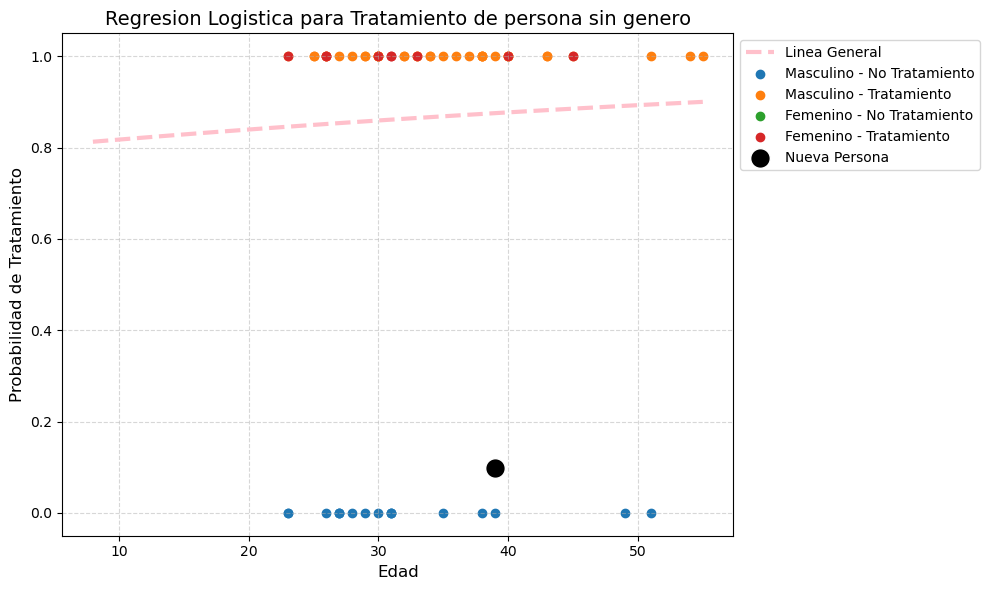

In [236]:
# promedios para dibujar una linea de separación 
promedios = df_survey2[variables_modelo].drop(columns=['Age']).mean()

plt.figure(figsize=(10, 6))

# linea de separación (no se si se llama correctamente de regresion)
# sin embargo da un acercamiento a segun la edad, saber si puede parecer enfermedad
# entonces para cada edad, hay una prediccion
rango_edades = np.linspace(df_survey2['Age'].min(), df_survey2['Age'].max(), 50)
X_plot_general = pd.DataFrame({ 
    'Age': rango_edades,
    **{col: promedios[col] for col in promedios.index} 
})
X_plot_general_escalado = scaler.transform(X_plot_general[variables_modelo].values)
prediccion_general = model.predict_proba(X_plot_general_escalado)[:, 1]
plt.plot(rango_edades, prediccion_general, color='pink', linewidth=3, linestyle='--', label='Linea General')

for genero, etiqueta_genero in generos.items():
    for tratamiento in [0, 1]:
        subconjunto = df_survey2[(df_survey2['Gender'] == genero) & (df_survey2['treatment'] == tratamiento)]
        etiqueta_tratamiento = 'No Tratamiento' if tratamiento == 0 else 'Tratamiento'
        # para cada subcojunto de genero y tratamiento, dibujo un color y etiqueta
        plt.scatter(subconjunto['Age'], subconjunto['treatment'],
                    label=f'{etiqueta_genero} - {etiqueta_tratamiento}')

# nueva persona
plt.scatter(nueva_persona_df['Age'], nueva_prediccion, c='black', label='Nueva Persona', s=200, edgecolors='white')

plt.title('Regresion Logistica para Tratamiento de persona sin genero', fontsize=14)
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Probabilidad de Tratamiento', fontsize=12)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [237]:
# Bueno, el conjunto de datos tiene carencias en cuanto a datos femeninos, o es una población totalmente expuesta
# por tanto o consideramos no valido el modelo, o los datos, o la limpieza de los datos, o estamos ante la situación
# de que, toda la población femenina está expuesta a tratamiento... Con los datos que tenemos, podemos ver que la probabilídad
# de tratamiento no teniendo en cuenta el genero es de solamente el 31% con antecedentes familiares, y sin antecedendes el 10%
# cuando se separa por genero la probabilídad es del 81% vs el 63%
# entiendo que no procede hacer imputación de valores, ni tampoco elegir columnas mas convenientes y borrar el resto de columnas antes 
# de eliminar los registros con nulos, lo cual podría cambiar mucho la conclusión, ya que no estaba en el enunciado ni los distintos pasos
# del ejercicio... esto me baso en el hecho de que el mismo enunciado no busca entrenar un modelo, que es fuera del contenido, sino entender
# como afectan todos estos factores a la calidad de los datos y a la capacidad de entrenar un modelo.
#
# Por tanto si el contexto fuera otro, es decir fuera un ejercicio libre o un proyecto laboral, no hubiera eliminado valores nulos, sino 
# que hubiera hecho exploracion de datos, hubiera buscado qué columnas son mas importantes, y hubiera hecho una extrategia para que la
# calidad de los datos no hubiera acabado así, sin una representacion mas homogenea de los distintos grupos (con-sin tratamiento, y M-F).
#
# Y hubiera hecho una eliminacion primero de esas columnas menos importantes, luego para cada columna hubiera decidido si hago una 
# imputacion de valores, con tecnicas sencillas tales como mediana o media, o incluso con alguna libreria del estilo de knn imputer, etc...
# Y donde afectara mucho a los valores y no viese conveniente la imputacion y no eliminase gran cantidad de registros, los hubiera eliminado.